<h1>💠Proyecto Final COIL: UNAM & PUCE💠</h1> <br>
<h2>Fecha: 19/05/2024</h2>

<h2>🚹 Integrantes:</h2>

<p>
◽ UNAM:
</p>
<p>
   ▪️ Pilares García Heber Adán <br>
   ▪️ Toledo Valencia Jesus Antonio
</p>

<p>
◽PUCE:
</p>
<p>
  ▪️ Estefano Andrés Galarza Ortega <br>
  ▪️ Byron Alexis Vargas Sánchez <br>
  ▪️ Francisco José Velasco Reyes
</p>

<h1><strong>🟨 MODELO NÚMERO 1: INICIAL</h1>

<h2><strong>1. Cargamos el Dataset</h2>

In [ ]:
# Procedemos a cargar el Dataset usando ipywidgets
from ipywidgets import FileUpload
import io

# Crea un objeto FileUpload
uploader = FileUpload()

# Muestra el widget de carga
display(uploader)

def on_upload_change(change):
    # Accede al archivo cargado
    uploaded_filename = next(iter(uploader.value))
    content = uploader.value[uploaded_filename]['content']

    # Escribe el contenido del archivo a un archivo local
    with open(uploaded_filename, 'wb') as f:
        f.write(content)
    print(f'Se ha cargado el archivo "{uploaded_filename}"')

# Asocia la función de cambio al widget de carga
uploader.observe(on_upload_change, names='_counter')

FileUpload(value={}, description='Upload')

In [ ]:
#Instalamos la librería "pyreadstat" en caso de no tenerla
import pandas as pd
import pyreadstat

df = pd.read_spss("EDG_1990_2021.sav")
df

<h2><strong>2. Limpieza de Datos:</h2>

<h3>Sacamos una muestra del 20% de los datos:</h3>

In [ ]:
# Sacando una muestra aleatoria del 20% de los datos
sample_df = df.sample(frac=0.20, random_state=7)  # random_state es una semilla para la reproducibilidad
sample_df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
1177163,Guayas,Guayaquil,Guayaquil,2011.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C90 Mieloma múltiple y tumores malignos de c...,C90 Mieloma múltiple y tumores malignos de c...,044 Mieloma multiple y tumores malignos de cél...,042 Mieloma múltiple y tumores malig de célula...,016 Tumores [neoplasias],018 Resto de tumores malignos,C900 Mieloma múltiple,"24 Neoplasia maligna del tejido linfático, hem..."
125559,Guayas,Guayaquil,Guayaquil,1992.0,Diciembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
901070,Los Ríos,Palenque,Palenque,2006.0,Julio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,"J18 Neumonía, organismo no especificado","J18 Neumonía, organismo no especificado",074 Neumonia,059 Neumonia,031 Enfermedades del sistema respiratorio,032 Neumonía,"J189 Neumonía, no especificada",46 Influenza y neumonía
1850553,Pastaza,Pastaza,Puyo,2020.0,Septiembre,28.0,2020-09-28,Ecuatoriana,Ecuador,Mujer,...,Urbana,Urbano,R54 Senilidad,R54 Senilidad,"094 Sintomas, signos y hallazgos anormales cl...","071 Sintoms,signs y hallz anorm cli.y d.lab, n...","056 Síntomas, signos y hallazgos anormales","058 Otros síntomas, signos y hallazgos anormal...",R54 Senilidad,99 Causas mal definidas
1662890,Manabí,Portoviejo,18 de Octubre,2018.0,Agosto,6.0,2018-08-06,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,C18 Tumor maligno del colon,C18 Tumor maligno del colon,030 Tumor maligno del colon del recto y del ano,"028 Tumor maligno del colon, del recto y del ano",016 Tumores [neoplasias],018 Resto de tumores malignos,"C189 Tumor maligno del colon, parte no especi...","10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81848,Loja,Loja,Santiago,1991.0,Agosto,NaN,NaN,NaN,,Mujer,...,Rural,Rural,,,999,999,999,,,NaN
1095120,Azuay,Cuenca,Cuenca,2010.0,Agosto,NaN,NaN,NaN,,Mujer,...,Rural,Rural,X59 Exposición a factores no especificados,X59 Exposición a factores no especificados,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X599 Exposición a factores no especificados q...,88 Resto de causas
655524,Los Ríos,Quevedo,Quevedo,2002.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,P28 Otros problemas respiratorios del recién...,P28 Otros problemas respiratorios del recién...,092 Ciertas afecciones originadas en el period...,069 Ciertas afecciones originadas en el period...,037 Ciertas afecciones originadas en el períod...,044 Otras afecciones respiratorias del recién ...,P285 Insuficiencia respiratoria del recién na...,55 Ciertas afecciones originadas en el período...
311561,Azuay,Cuenca,Cuenca,1996.0,Enero,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN


<h3>Generamos un archivo CSV para filtrar los datos</h3>

In [ ]:
# Cada grupo debe seleccionar el random_state de acuerdo al número de grupo
sample_df.to_csv("muestra_20.csv",index=False)

<h5>Filtramos las variables del Dataset, en este caso se filtro por: <i>(Provincia, Canton, Parroquia, Sexo, Año Nacimiento, Año Fallecimiento, Mes Fallecimiento y Causa de muerte "Ic1")</i></h5>

In [ ]:
sample_df[["prov_insc", "cant_insc", "parr_insc", "sexo", "anio_nac","anio_fall","mes_fall","lc1"]].to_csv("muestra_20.csv", index=False)

In [ ]:
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_20.csv')
df

,prov_insc,cant_insc,parr_insc,sexo,anio_nac,anio_fall,mes_fall,lc1
0,Guayas,Guayaquil,Guayaquil,Hombre,1947.0,2011.0,Noviembre,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,Guayaquil,Guayaquil,Hombre,1923.0,1992.0,Diciembre,NaN
2,Los Ríos,Palenque,Palenque,Hombre,2005.0,2006.0,Julio,46 Influenza y neumonía
3,Pastaza,Pastaza,Puyo,Mujer,1924.0,2020.0,Septiembre,99 Causas mal definidas
4,Manabí,Portoviejo,18 de Octubre,Hombre,1933.0,2018.0,Agosto,"10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...,...,...,...
396451,Pichincha,Distrito Metropolitano de Quito,Quito,Hombre,1937.0,2011.0,Agosto,30 Trastornos mentales y del comportamiento po...
396452,Tungurahua,Ambato,Ambato,Hombre,1945.0,2011.0,Abril,88 Resto de causas
396453,Manabí,Jipijapa,San Lorenzo de Jipijapa,Mujer,1920.0,2021.0,Junio,42 Enfermedades cerebrovasculares
396454,Los Ríos,Quevedo,Siete de Octubre,Hombre,1956.0,2019.0,Enero,47 Enfermedades crónicas de las vías respirato...


<h4>Verificamos cantidad de nulos con el método <i>isnull()</i> y <i>sum()</i>, respectivamente</h4>

In [ ]:
#Verificamos el número total de Nulos
df.isnull().sum()

prov_insc      606
cant_insc      606
parr_insc      606
sexo             0
anio_nac         0
anio_fall        0
mes_fall         0
lc1          72967
dtype: int64

<h2><strong>Eliminación:</h2>

<h5>Al existir una cantidad considerable de valores N/A (Nulos), se procede con la eliminación de estos datos innecesarios:</h5>

In [ ]:
#Eliminamos valores Null del dataframe
df_clean = df.dropna(axis=0)
df_clean

,prov_insc,cant_insc,parr_insc,sexo,anio_nac,anio_fall,mes_fall,lc1
0,Guayas,Guayaquil,Guayaquil,Hombre,1947.0,2011.0,Noviembre,"24 Neoplasia maligna del tejido linfático, hem..."
2,Los Ríos,Palenque,Palenque,Hombre,2005.0,2006.0,Julio,46 Influenza y neumonía
3,Pastaza,Pastaza,Puyo,Mujer,1924.0,2020.0,Septiembre,99 Causas mal definidas
4,Manabí,Portoviejo,18 de Octubre,Hombre,1933.0,2018.0,Agosto,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,Ibarra,San Miguel de Ibarra,Mujer,1918.0,2007.0,Agosto,42 Enfermedades cerebrovasculares
...,...,...,...,...,...,...,...,...
396450,El Oro,Machala,Machala,Mujer,1954.0,2021.0,Diciembre,26 Diabetes Mellitus
396451,Pichincha,Distrito Metropolitano de Quito,Quito,Hombre,1937.0,2011.0,Agosto,30 Trastornos mentales y del comportamiento po...
396452,Tungurahua,Ambato,Ambato,Hombre,1945.0,2011.0,Abril,88 Resto de causas
396453,Manabí,Jipijapa,San Lorenzo de Jipijapa,Mujer,1920.0,2021.0,Junio,42 Enfermedades cerebrovasculares


<h5>Verificamos nuevamente la cantidad de nulos con el método <i>isnull()</i> y <i>sum()</i>, respectivamente con <i>"df_clean"</i></h5>

In [ ]:
#Verificamos el número total de Nulos con df_clean, la copia limpia creada anteriormente
df_clean.isnull().sum()

prov_insc    0
cant_insc    0
parr_insc    0
sexo         0
anio_nac     0
anio_fall    0
mes_fall     0
lc1          0
dtype: int64

<h5>Como se puede observar, ya no tenemos valores nulos en nuestra data</h5>

<h5>Continuando con el proceso de eliminación, vamos a eliminar las variables no necesarias del "lc1", específicamente las siguientes causas de muerte: <i>(Causas mal definidas, COVID-19, Resto de causas, Homicidios, Disparos con arma de fuego, Eventos de intención no determinada, y valores no definidos)</i></h5>

In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0'
]

# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_clean = df_clean[~df_clean['lc1'].isin(palabras_a_eliminar)]
df_clean

,prov_insc,cant_insc,parr_insc,sexo,anio_nac,anio_fall,mes_fall,lc1
0,Guayas,Guayaquil,Guayaquil,Hombre,1947.0,2011.0,Noviembre,"24 Neoplasia maligna del tejido linfático, hem..."
2,Los Ríos,Palenque,Palenque,Hombre,2005.0,2006.0,Julio,46 Influenza y neumonía
4,Manabí,Portoviejo,18 de Octubre,Hombre,1933.0,2018.0,Agosto,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,Ibarra,San Miguel de Ibarra,Mujer,1918.0,2007.0,Agosto,42 Enfermedades cerebrovasculares
6,Pichincha,Distrito Metropolitano de Quito,Quito,Mujer,2002.0,2002.0,Septiembre,4 Enfermedades inmunoprevenibles
...,...,...,...,...,...,...,...,...
396448,Guayas,Guayaquil,Tarqui,Mujer,1951.0,2013.0,Agosto,17 Neoplasia maligna de la mama
396450,El Oro,Machala,Machala,Mujer,1954.0,2021.0,Diciembre,26 Diabetes Mellitus
396451,Pichincha,Distrito Metropolitano de Quito,Quito,Hombre,1937.0,2011.0,Agosto,30 Trastornos mentales y del comportamiento po...
396453,Manabí,Jipijapa,San Lorenzo de Jipijapa,Mujer,1920.0,2021.0,Junio,42 Enfermedades cerebrovasculares


<h4>El número de filas ha sido reducido considerablemente, ya no tenemos las causas de muerte mencionadas</h4>

<h2><strong>Sustitución: </h2>

<h4>Al ser un Dataset con valores reales ya filtrados y limpios, <strong>no es prudente alterar los datos con la sustitución</strong>, por lo que no aplica en este caso particular</h4>

<h2><strong>3. Datos con ruido:</h2>

<h3>No se han detectado anomalías en los datos ni valores atípicos</h3>


<h2><strong>4. Transformación de Datos:</h2>

<h3>Normalización / Estandarización: </h3>

<h4>Se creará una nueva variable que combine el año y mes de fallecimiento, estructurando la información</h4>

## import pandas as pd

#La variable nueva será "fecha_fall"
# Convertir el DataFrame df_clean en una copia
df_clean = df_clean.copy()

# Convertir la columna 'anio_fall' a tipo string
df_clean['anio_fall'] = df_clean['anio_fall'].astype(str)

# Extraer el año y el mes de la columna 'anio_fall'
df_clean.loc[:, 'anio'] = df_clean['anio_fall'].str.extract(r'(\d{4})')

# Mapear los nombres de los meses a números
month_dict = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Septiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

df_clean.loc[:, 'mes'] = df_clean['mes_fall'].map(month_dict)

# Crear una nueva columna 'fecha_fall' que combine año y mes sin el día
df_clean.loc[:, 'fecha_fall'] = pd.to_datetime(df_clean['anio'] + '-' + df_clean['mes'], format='%Y-%m').dt.to_period('M')

# Eliminar las columnas 'mes' y 'anio'
df_clean.drop(columns=['mes', 'anio'], inplace=True)
# Eliminar las columnas 'mes_fall' y 'anio_fall'
df_clean.drop(columns=['mes_fall', 'anio_fall'], inplace=True)
df_clean


<h2><strong>5. Datos categóricos:</h2>

<h3><u>Con orden:</u> </h3>

<h4>Procedemos a ordenar los datos según la fecha de fallecimiento de la persona</h4>

In [ ]:
#Ordenamos según la fecha de fallecimiento con el método "sort_values"
df_clean = df_clean.sort_values(by = 'fecha_fall') #Variable "fecha_fall" creada anteriormente
df_clean

,prov_insc,cant_insc,parr_insc,sexo,anio_nac,lc1,fecha_fall
166368,Tungurahua,Ambato,Santa Rosa,Mujer,1957.0,2 Tuberculosis,1997-01
224298,Pichincha,Distrito Metropolitano de Quito,Yaruqui,Hombre,1996.0,27 Desnutrición y anemias nutricionales,1997-01
47933,El Oro,Balsas,Balsas,Hombre,1904.0,"41 Insuficiencia cardíaca, complicaciones y en...",1997-01
236956,Guayas,Balzar,Balzar,Mujer,1927.0,34 Enfermedades hipertensivas,1997-01
148008,Guayas,Balzar,Balzar,Mujer,1979.0,53 Enfermedades del sistema urinario,1997-01
...,...,...,...,...,...,...,...
40344,Guayas,Guayaquil,Tarqui,Mujer,1933.0,27 Desnutrición y anemias nutricionales,2021-12
386742,Pichincha,Distrito Metropolitano de Quito,Quitumbe,Hombre,1935.0,35 Enfermedades isquémicas del corazón,2021-12
194260,Santa Elena,Santa Elena,Manglaralto,Mujer,1977.0,51 Cirrosis y otras enfermedades del hígado,2021-12
364976,Pichincha,Distrito Metropolitano de Quito,Iñaquito,Hombre,1972.0,57 Accidentes de transporte terrestre,2021-12


<h5>Los datos han sido ordenados según la <u>fecha de fallecimiento</u>, desde 1997-2021</h5>

<h2><strong>6. Modelo</h2>

<h3>Instalamos la Librería <u>K-Modes</u> en caso de no tenerla</h3>

In [ ]:
# Instalar la librería k-modes
!pip install kmodes

# Importamos la función k-modes
from kmodes.kmodes import KModes

<h3>Determinamos el valor más adecuado para "K"</h3>

<h4>Procedemos a utilizar el <u>Método del Codo</u> para obtener el valor:</h4>

In [ ]:
# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_clean)
  cost_red.append(kmode_red.cost_)

<h4>Imprimimos el arreglo <u>cost_red</u> para determinar los costos</h4>

In [ ]:
#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

[1385312.0,
 1229902.0,
 1195560.0,
 1166455.0,
 1162820.0,
 1161932.0,
 1138616.0,
 1125052.0,
 1115925.0]

<h4>Generamos la grafica con ayuda de <u>Matplotlib</u> para determinar <strong><u>"K"</strong></h4>

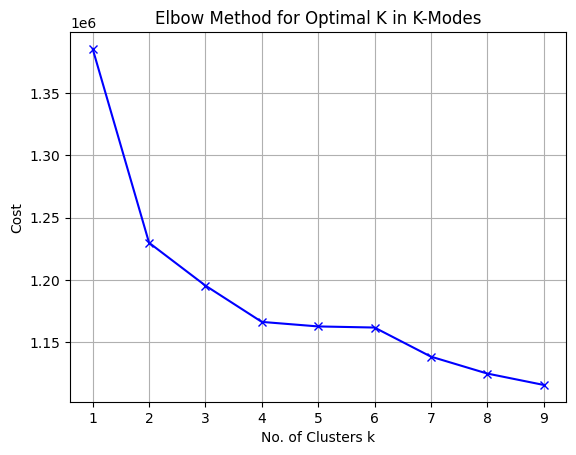

In [ ]:
#Instalamos la librería Matplotlib en caso de no tenerla:
!pip install matplotlib
# Importamos la librería Matplotlib
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

<h4>Por análisis visual, determinamos que <strong><u>2</u></strong> puede ser el <u>número de clusters a necesitar </u> para nuestro modelo.</h4>

<h4>Por lo tanto construimos el modelo siguiendo esta deducción:</h4>

In [ ]:
# Construimos el modelo con 2 clusters

kmode_2 = KModes(n_clusters=2) # Usaremos los hiperparámetros pre-establecidos
clusters_2 = kmode_2.fit_predict(df_clean)
clusters_2

array([1, 1, 0, ..., 1, 1, 0], dtype=uint16)

<h4> Agregamos las etiquetas necesarias para poder clasificar los clusters (0,1) </h4>

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels2 = df_clean.copy()
df_labels2.insert(2,"cluster_labels", clusters_2)
df_labels2

,prov_insc,cant_insc,cluster_labels,parr_insc,sexo,anio_nac,lc1,fecha_fall
166368,Tungurahua,Ambato,1,Santa Rosa,Mujer,1957.0,2 Tuberculosis,1997-01
224298,Pichincha,Distrito Metropolitano de Quito,1,Yaruqui,Hombre,1996.0,27 Desnutrición y anemias nutricionales,1997-01
47933,El Oro,Balsas,0,Balsas,Hombre,1904.0,"41 Insuficiencia cardíaca, complicaciones y en...",1997-01
236956,Guayas,Balzar,0,Balzar,Mujer,1927.0,34 Enfermedades hipertensivas,1997-01
148008,Guayas,Balzar,0,Balzar,Mujer,1979.0,53 Enfermedades del sistema urinario,1997-01
...,...,...,...,...,...,...,...,...
40344,Guayas,Guayaquil,0,Tarqui,Mujer,1933.0,27 Desnutrición y anemias nutricionales,2021-12
386742,Pichincha,Distrito Metropolitano de Quito,0,Quitumbe,Hombre,1935.0,35 Enfermedades isquémicas del corazón,2021-12
194260,Santa Elena,Santa Elena,1,Manglaralto,Mujer,1977.0,51 Cirrosis y otras enfermedades del hígado,2021-12
364976,Pichincha,Distrito Metropolitano de Quito,1,Iñaquito,Hombre,1972.0,57 Accidentes de transporte terrestre,2021-12


<h4> Procedemos con el análisis de <strong> Average Silhoutete Score </strong> (con ayuda de la biblioteca <i >gower<i>) , el cual nos sirve para evaluar nuestro parámetro de agrupación en clústers. </h4>

In [ ]:
# Instalamos la librería de gower

!pip install gower

<h4> Para el cálculo del <strong> Average Silhoutte Score </strong>, consideramos una <u> muestra de 10,000 </u> por cuestiones de recursos computacionales disponibles. </h4>

In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels2.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=10000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 2: 0.10260127


<h4>Construimos un modelo con 4 clústers para comparar con el de 2.</h4>

In [ ]:
# Construimos el modelo con 4 clusters

kmode_4 = KModes(n_clusters=4) # Usaremos los hiperparámetros pre-establecidos
clusters_4 = kmode_4.fit_predict(df_clean)
clusters_4

array([1, 3, 0, ..., 1, 3, 0], dtype=uint16)

<h4>Colocamos las etiquetas correspondientes.</h4>

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels4 = df_clean.copy()
df_labels4.insert(4,"cluster_labels", clusters_4)
df_labels4

,prov_insc,cant_insc,parr_insc,sexo,cluster_labels,anio_nac,lc1,fecha_fall
166368,Tungurahua,Ambato,Santa Rosa,Mujer,1,1957.0,2 Tuberculosis,1997-01
224298,Pichincha,Distrito Metropolitano de Quito,Yaruqui,Hombre,3,1996.0,27 Desnutrición y anemias nutricionales,1997-01
47933,El Oro,Balsas,Balsas,Hombre,0,1904.0,"41 Insuficiencia cardíaca, complicaciones y en...",1997-01
236956,Guayas,Balzar,Balzar,Mujer,2,1927.0,34 Enfermedades hipertensivas,1997-01
148008,Guayas,Balzar,Balzar,Mujer,2,1979.0,53 Enfermedades del sistema urinario,1997-01
...,...,...,...,...,...,...,...,...
40344,Guayas,Guayaquil,Tarqui,Mujer,2,1933.0,27 Desnutrición y anemias nutricionales,2021-12
386742,Pichincha,Distrito Metropolitano de Quito,Quitumbe,Hombre,3,1935.0,35 Enfermedades isquémicas del corazón,2021-12
194260,Santa Elena,Santa Elena,Manglaralto,Mujer,1,1977.0,51 Cirrosis y otras enfermedades del hígado,2021-12
364976,Pichincha,Distrito Metropolitano de Quito,Iñaquito,Hombre,3,1972.0,57 Accidentes de transporte terrestre,2021-12


<h2><strong>Conversión de columnas categóricas a strings </h2>
<h4>Convertimos las columnas de tipo de dato categórico a string a partir de nuestra sub-muestra de 10,000 para poder proceder con el cáculo de la matriz de distancia de Gower, así como el Silhoutte Score</h4>

In [ ]:
# Convertir todas las columnas categóricas a strings
df_str = df_labels4.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=10000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 4: 0.0344881


<h2><strong>Análisis de Correspondencias Múltiples (MCA) </h2>
<h4>Redujimos la dimensionalidad del dataset a 2 variables usando el Análisis de Correspondencias Múltiples (MCA):</h4>

In [ ]:
# Aplicamos MCA para reducir la dimensionalidad del dataset original

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242825 entries, 166368 to 366958
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype    
---  ------      --------------   -----    
 0   prov_insc   242825 non-null  object   
 1   cant_insc   242825 non-null  object   
 2   parr_insc   242825 non-null  object   
 3   sexo        242825 non-null  object   
 4   anio_nac    242825 non-null  float64  
 5   lc1         242825 non-null  object   
 6   fecha_fall  242825 non-null  period[M]
dtypes: float64(1), object(5), period[M](1)
memory usage: 14.8+ MB


<h4>Transformación de variables <strong>NO Categóricas</strong> a tipo <u> Dummy </h4>

In [ ]:
# Transformamos las variables no categóricas a variables tipo dummy

df_categorical = pd.get_dummies(df_clean)
df_categorical

,anio_nac,fecha_fall,prov_insc_Azuay,prov_insc_Bolívar,prov_insc_Carchi,prov_insc_Cañar,prov_insc_Chimborazo,prov_insc_Cotopaxi,prov_insc_El Oro,prov_insc_Esmeraldas,...,lc1_57 Accidentes de transporte terrestre,lc1_58 Caidas accidentales,lc1_6 Septicemia,lc1_60 Ahogamiento y sumersión accidentales,lc1_61 Accidentes que obstruyen la respiración,lc1_62 Envenenamiento accidental,lc1_63 Lesiones autoinflingidas intencionalmente (Suicidio),lc1_7 Enfermedad por virus de la inmunodeficiencia (VIH),lc1_8 Neoplasia maligna del esófago,lc1_9 Neoplasia maligna del estómago
166368,1957.0,1997-01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
224298,1996.0,1997-01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47933,1904.0,1997-01,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
236956,1927.0,1997-01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148008,1979.0,1997-01,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40344,1933.0,2021-12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
386742,1935.0,2021-12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
194260,1977.0,2021-12,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
364976,1972.0,2021-12,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


<h4> Instalamos e importamos la biblioteca <strong><u>Prince</u></strong> , que contiene el método <strong>MCA </h4>

In [ ]:
# Reducción de la dimensionalidad

# Instalamos Prince
!pip install prince

<h4>Usando <strong>Prince</strong>: <br>
1. Indicamos el no. de componentes que requerimos <br>
2. Sacamos una nueva muestra por motivos de recursos computacionales disponibles <br>
3. Ajustamos el Análisis de Correspondencias Múltiples (MCA) a nuestros datos</h4>

In [ ]:
# Importamos la libraría Prince que contiene MCA
import prince

# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_categoricalCopy = df_categorical.sample(n=20000, random_state=1)

# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categoricalCopy)
mca

# Transforme el conjunto de datos (esto le dará las
# coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categoricalCopy)
mca_coordinates

,0,1
280171,0.005287,0.082996
213532,0.033407,0.029047
54091,-0.075673,-0.033738
115055,-0.000390,0.058222
143683,0.053163,0.022860
...,...,...
381644,-0.086264,-0.019812
85686,0.033397,0.035156
361443,0.060769,-0.080025
27414,-0.080452,-0.023124


<h4> Marcamos con etiquetas a nuestros clústers (para el clúster construido con K=2) </h4>

In [ ]:
# Agregamos una columna con la etiqueta de los clusters. K = 2

mca_coordinates['cluster_labels'] = df_labels2['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
280171,0.005287,0.082996,1
213532,0.033407,0.029047,1
54091,-0.075673,-0.033738,0
115055,-0.000390,0.058222,0
143683,0.053163,0.022860,0


<h4> Finalmente, haciendo uso de la biblioteca <strong>Seaborn</strong>: <br>
&#x2022; Dibujamos el diagrama de dispersión, coloreando los puntos por grupo <br>
&#x2022; Agregamos títulos y leyendas a nuestro gráfico para una mejor comprensión <br>
&#x2022; Desplegamos el gráfico </h4>

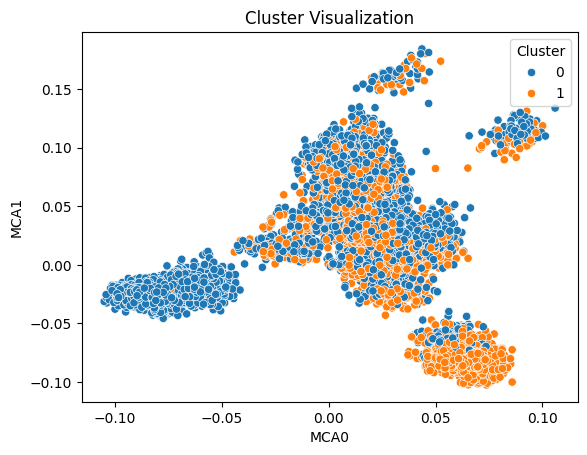

In [ ]:
# Dibujamos los clusters
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],
                y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

<h1><strong>🟨 MODELO NÚMERO 2: PRUEBAS</h1>

<h2>Se toman mismas variables, pero con nuevo enfoque </h2>

In [ ]:
sample_df[["prov_fall", "edad", "sexo","anio_fall","mes_fall","lc1"]].to_csv("muestra_20.csv", index=False)

In [ ]:
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_20.csv')
df

,prov_fall,edad,sexo,anio_fall,mes_fall,lc1
0,Guayas,64.0,Hombre,2011.0,Noviembre,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,1992.0,Diciembre,NaN
2,Guayas,10.0,Hombre,2006.0,Julio,46 Influenza y neumonía
3,Pastaza,95.0,Mujer,2020.0,Septiembre,99 Causas mal definidas
4,Manabí,85.0,Hombre,2018.0,Agosto,"10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...,...
396451,Pichincha,74.0,Hombre,2011.0,Agosto,30 Trastornos mentales y del comportamiento po...
396452,Tungurahua,66.0,Hombre,2011.0,Abril,88 Resto de causas
396453,Manabí,100.0,Mujer,2021.0,Junio,42 Enfermedades cerebrovasculares
396454,Los Ríos,62.0,Hombre,2019.0,Enero,47 Enfermedades crónicas de las vías respirato...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396456 entries, 0 to 396455
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   prov_fall  396456 non-null  object 
 1   edad       396456 non-null  float64
 2   sexo       396456 non-null  object 
 3   anio_fall  396456 non-null  float64
 4   mes_fall   396456 non-null  object 
 5   lc1        323489 non-null  object 
dtypes: float64(2), object(4)
memory usage: 18.1+ MB


In [ ]:
df_filtrado = df[df["edad"] <= 60]
df_filtrado

,prov_fall,edad,sexo,anio_fall,mes_fall,lc1
2,Guayas,10.0,Hombre,2006.0,Julio,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,2002.0,Septiembre,4 Enfermedades inmunoprevenibles
8,Guayas,28.0,Hombre,2004.0,Mayo,64 Agresiones (Homicidios)
10,Tungurahua,8.0,Mujer,1990.0,Marzo,NaN
12,Cañar,16.0,Mujer,2001.0,Agosto,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...,...,...
396443,Pichincha,50.0,Hombre,2019.0,Noviembre,57 Accidentes de transporte terrestre
396444,El Oro,22.0,Hombre,2009.0,Mayo,88 Resto de causas
396445,Pichincha,40.0,Mujer,2010.0,Noviembre,8 Neoplasia maligna del esófago
396449,Azuay,53.0,Hombre,2005.0,Octubre,65 Eventos de intención no determinada


In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0'
]

# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_filtrado = df_filtrado[~df_filtrado['lc1'].isin(palabras_a_eliminar)]
df_filtrado

,prov_fall,edad,sexo,anio_fall,mes_fall,lc1
2,Guayas,10.0,Hombre,2006.0,Julio,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,2002.0,Septiembre,4 Enfermedades inmunoprevenibles
10,Tungurahua,8.0,Mujer,1990.0,Marzo,NaN
12,Cañar,16.0,Mujer,2001.0,Agosto,63 Lesiones autoinflingidas intencionalmente (...
15,Guayas,45.0,Hombre,1996.0,Septiembre,NaN
...,...,...,...,...,...,...
396441,Esmeraldas,37.0,Hombre,1990.0,Octubre,NaN
396442,Azuay,50.0,Mujer,2003.0,Noviembre,42 Enfermedades cerebrovasculares
396443,Pichincha,50.0,Hombre,2019.0,Noviembre,57 Accidentes de transporte terrestre
396445,Pichincha,40.0,Mujer,2010.0,Noviembre,8 Neoplasia maligna del esófago


In [ ]:
#Verificamos el número total de Nulos
df_filtrado.isnull().sum()

prov_fall        0
edad             0
sexo             0
anio_fall        0
mes_fall         0
lc1          39134
dtype: int64

In [ ]:
#Eliminamos valores Null del dataframe
df_filtrado = df_filtrado.dropna(axis=0)
df_filtrado

,prov_fall,edad,sexo,anio_fall,mes_fall,lc1
2,Guayas,10.0,Hombre,2006.0,Julio,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,2002.0,Septiembre,4 Enfermedades inmunoprevenibles
12,Cañar,16.0,Mujer,2001.0,Agosto,63 Lesiones autoinflingidas intencionalmente (...
17,Azuay,2.0,Hombre,2000.0,Julio,55 Ciertas afecciones originadas en el período...
20,Guayas,1.0,Mujer,2006.0,Julio,55 Ciertas afecciones originadas en el período...
...,...,...,...,...,...,...
396434,Azuay,47.0,Hombre,2016.0,Octubre,26 Diabetes Mellitus
396439,Pichincha,21.0,Mujer,2012.0,Noviembre,27 Desnutrición y anemias nutricionales
396442,Azuay,50.0,Mujer,2003.0,Noviembre,42 Enfermedades cerebrovasculares
396443,Pichincha,50.0,Hombre,2019.0,Noviembre,57 Accidentes de transporte terrestre


In [ ]:
#Verificamos el número total de Nulos
df_filtrado.isnull().sum()

prov_fall    0
edad         0
sexo         0
anio_fall    0
mes_fall     0
lc1          0
dtype: int64

In [ ]:
import pandas as pd

#La variable nueva será "fecha_fall"
# Convertir el DataFrame df_clean en una copia
df_clean = df_filtrado.copy()

# Mapear los nombres de los meses a números
month_dict = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Septiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

df_clean.loc[:, 'mes'] = df_clean['mes_fall'].map(month_dict)

# Crear una nueva columna mes
df_clean.loc[:, 'mes_fall'] = pd.to_datetime(df_clean['mes'], format='%m').dt.to_period('M')

# Eliminar las columnas 'mes_fall' y 'anio_fall'
df_clean.drop(columns=['mes_fall'], inplace=True)
df_clean

,prov_fall,edad,sexo,anio_fall,lc1,mes
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía,07
6,Pichincha,3.0,Mujer,2002.0,4 Enfermedades inmunoprevenibles,09
12,Cañar,16.0,Mujer,2001.0,63 Lesiones autoinflingidas intencionalmente (...,08
17,Azuay,2.0,Hombre,2000.0,55 Ciertas afecciones originadas en el período...,07
20,Guayas,1.0,Mujer,2006.0,55 Ciertas afecciones originadas en el período...,07
...,...,...,...,...,...,...
396434,Azuay,47.0,Hombre,2016.0,26 Diabetes Mellitus,10
396439,Pichincha,21.0,Mujer,2012.0,27 Desnutrición y anemias nutricionales,11
396442,Azuay,50.0,Mujer,2003.0,42 Enfermedades cerebrovasculares,11
396443,Pichincha,50.0,Hombre,2019.0,57 Accidentes de transporte terrestre,11


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93683 entries, 2 to 396445
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   prov_fall  93683 non-null  object 
 1   edad       93683 non-null  float64
 2   sexo       93683 non-null  object 
 3   anio_fall  93683 non-null  float64
 4   lc1        93683 non-null  object 
 5   mes        93683 non-null  object 
dtypes: float64(2), object(4)
memory usage: 5.0+ MB


In [ ]:
df_clean[["edad","anio_fall","mes"]] = df_clean[["edad","anio_fall","mes"]].astype("int")

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93683 entries, 2 to 396445
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prov_fall  93683 non-null  object
 1   edad       93683 non-null  int32 
 2   sexo       93683 non-null  object
 3   anio_fall  93683 non-null  int32 
 4   lc1        93683 non-null  object
 5   mes        93683 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 3.9+ MB


In [ ]:
df_clean

,prov_fall,edad,sexo,anio_fall,lc1,mes
2,Guayas,10,Hombre,2006,46 Influenza y neumonía,7
6,Pichincha,3,Mujer,2002,4 Enfermedades inmunoprevenibles,9
12,Cañar,16,Mujer,2001,63 Lesiones autoinflingidas intencionalmente (...,8
17,Azuay,2,Hombre,2000,55 Ciertas afecciones originadas en el período...,7
20,Guayas,1,Mujer,2006,55 Ciertas afecciones originadas en el período...,7
...,...,...,...,...,...,...
396434,Azuay,47,Hombre,2016,26 Diabetes Mellitus,10
396439,Pichincha,21,Mujer,2012,27 Desnutrición y anemias nutricionales,11
396442,Azuay,50,Mujer,2003,42 Enfermedades cerebrovasculares,11
396443,Pichincha,50,Hombre,2019,57 Accidentes de transporte terrestre,11


In [ ]:
# Instalar la librería k-modes
!pip install kmodes

# Importamos la función k-modes
from kmodes.kmodes import KModes

In [ ]:
# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_clean)
  cost_red.append(kmode_red.cost_)

In [ ]:
#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

[445258.0,
 419000.0,
 391046.0,
 385174.0,
 379524.0,
 374575.0,
 369897.0,
 365837.0,
 362280.0]

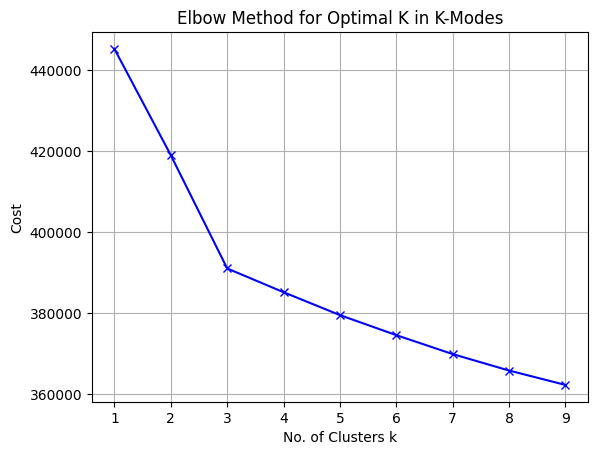

In [ ]:
#Instalamos la librería Matplotlib en caso de no tenerla:
!pip install matplotlib
# Importamos la librería Matplotlib
import matplotlib.pyplot as plt
plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [ ]:
# Construimos el modelo con 3 clusters

kmode_3 = KModes(n_clusters=3) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_3 = kmode_3.fit_predict(df_clean)
clusters_3

array([0, 2, 2, ..., 2, 1, 1], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels3 = df_clean.copy()
df_labels3.insert(2,"cluster_labels", clusters_3)
df_labels3

,prov_fall,edad,cluster_labels,sexo,anio_fall,lc1,mes
2,Guayas,10,0,Hombre,2006,46 Influenza y neumonía,7
6,Pichincha,3,2,Mujer,2002,4 Enfermedades inmunoprevenibles,9
12,Cañar,16,2,Mujer,2001,63 Lesiones autoinflingidas intencionalmente (...,8
17,Azuay,2,1,Hombre,2000,55 Ciertas afecciones originadas en el período...,7
20,Guayas,1,0,Mujer,2006,55 Ciertas afecciones originadas en el período...,7
...,...,...,...,...,...,...,...
396434,Azuay,47,0,Hombre,2016,26 Diabetes Mellitus,10
396439,Pichincha,21,1,Mujer,2012,27 Desnutrición y anemias nutricionales,11
396442,Azuay,50,2,Mujer,2003,42 Enfermedades cerebrovasculares,11
396443,Pichincha,50,1,Hombre,2019,57 Accidentes de transporte terrestre,11


In [ ]:
# Instalamos la librería de gower

!pip install gower

In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels3.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=5000, random_state=40)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 3: 0.064914234


In [ ]:
# Aplicamos MCA para reducir la dimensionalidad del dataset original

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93683 entries, 2 to 396445
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prov_fall  93683 non-null  object
 1   edad       93683 non-null  int32 
 2   sexo       93683 non-null  object
 3   anio_fall  93683 non-null  int32 
 4   lc1        93683 non-null  object
 5   mes        93683 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 5.9+ MB


In [ ]:
# Transformamos las variables no categóricas a variables tipo dummy

df_categorical = pd.get_dummies(df_clean)
df_categorical

,edad,anio_fall,mes,prov_fall_Azuay,prov_fall_Bolívar,prov_fall_Carchi,prov_fall_Cañar,prov_fall_Chimborazo,prov_fall_Cotopaxi,prov_fall_El Oro,...,lc1_57 Accidentes de transporte terrestre,lc1_58 Caidas accidentales,lc1_6 Septicemia,lc1_60 Ahogamiento y sumersión accidentales,lc1_61 Accidentes que obstruyen la respiración,lc1_62 Envenenamiento accidental,lc1_63 Lesiones autoinflingidas intencionalmente (Suicidio),lc1_7 Enfermedad por virus de la inmunodeficiencia (VIH),lc1_8 Neoplasia maligna del esófago,lc1_9 Neoplasia maligna del estómago
2,10,2006,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3,2002,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,16,2001,8,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17,2,2000,7,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,1,2006,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396434,47,2016,10,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396439,21,2012,11,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396442,50,2003,11,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396443,50,2019,11,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Reducción de la dimensionalidad

# Instalamos Prince
!pip install prince

In [ ]:
# Importamos la libraría Prince que contiene MCA
import prince

# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_categoricalCopy = df_categorical.sample(n=20000, random_state=1)

# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categoricalCopy)
mca

# Transforme el conjunto de datos (esto le dará las
# coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categoricalCopy)
mca_coordinates

,0,1
320813,-0.210111,-0.118494
96820,-0.050091,0.298424
68239,-0.081428,-0.090148
228364,-0.046052,-0.185035
238556,-0.228233,-0.014545
...,...,...
195834,0.250754,-0.083926
130222,0.198587,0.188052
150860,0.185599,-0.136603
191627,-0.067695,0.224613


In [ ]:
# Agregamos una columna con la etiqueta de los clusters. K = 2

mca_coordinates['cluster_labels'] = df_labels3['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
320813,-0.210111,-0.118494,0
96820,-0.050091,0.298424,1
68239,-0.081428,-0.090148,0
228364,-0.046052,-0.185035,0
238556,-0.228233,-0.014545,0


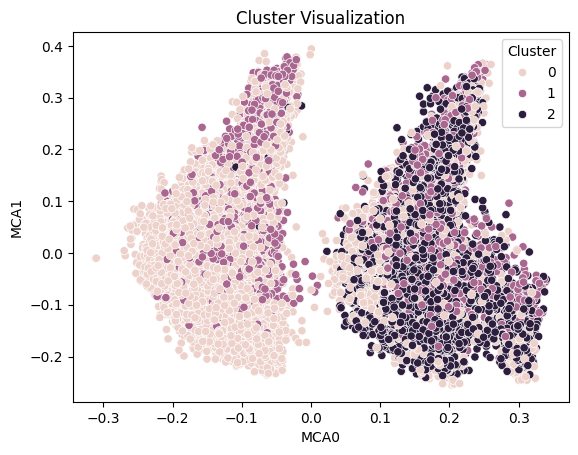

In [ ]:
# Dibujamos los clusters
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Dibuja el diagrama de dispersión coloreando los puntos por grupo.
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],
                y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

<h1><strong>🟨 MODELO NÚMERO 3: PRUEBAS</h1>

<h2>Se simplifican las variables y se hacen más cambios</h2>

In [ ]:
sample_df[["prov_fall", "edad", "sexo","anio_fall","lc1"]].to_csv("muestra_20.csv", index=False)
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_20.csv')
df

,prov_fall,edad,sexo,anio_fall,lc1
0,Guayas,64.0,Hombre,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,1992.0,NaN
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía
3,Pastaza,95.0,Mujer,2020.0,99 Causas mal definidas
4,Manabí,85.0,Hombre,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...
396451,Pichincha,74.0,Hombre,2011.0,30 Trastornos mentales y del comportamiento po...
396452,Tungurahua,66.0,Hombre,2011.0,88 Resto de causas
396453,Manabí,100.0,Mujer,2021.0,42 Enfermedades cerebrovasculares
396454,Los Ríos,62.0,Hombre,2019.0,47 Enfermedades crónicas de las vías respirato...


In [ ]:
df_filtrado = df[df["edad"] <= 60]
df_filtrado

,prov_fall,edad,sexo,anio_fall,lc1
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,2002.0,4 Enfermedades inmunoprevenibles
8,Guayas,28.0,Hombre,2004.0,64 Agresiones (Homicidios)
10,Tungurahua,8.0,Mujer,1990.0,NaN
12,Cañar,16.0,Mujer,2001.0,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...,...
396443,Pichincha,50.0,Hombre,2019.0,57 Accidentes de transporte terrestre
396444,El Oro,22.0,Hombre,2009.0,88 Resto de causas
396445,Pichincha,40.0,Mujer,2010.0,8 Neoplasia maligna del esófago
396449,Azuay,53.0,Hombre,2005.0,65 Eventos de intención no determinada


In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0'
]
# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_filtrado = df_filtrado[~df_filtrado['lc1'].isin(palabras_a_eliminar)]
df_filtrado

,prov_fall,edad,sexo,anio_fall,lc1
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,2002.0,4 Enfermedades inmunoprevenibles
10,Tungurahua,8.0,Mujer,1990.0,NaN
12,Cañar,16.0,Mujer,2001.0,63 Lesiones autoinflingidas intencionalmente (...
15,Guayas,45.0,Hombre,1996.0,NaN
...,...,...,...,...,...
396441,Esmeraldas,37.0,Hombre,1990.0,NaN
396442,Azuay,50.0,Mujer,2003.0,42 Enfermedades cerebrovasculares
396443,Pichincha,50.0,Hombre,2019.0,57 Accidentes de transporte terrestre
396445,Pichincha,40.0,Mujer,2010.0,8 Neoplasia maligna del esófago


In [ ]:
#Verificamos el número total de Nulos
df_filtrado.isnull().sum()

prov_fall        0
edad             0
sexo             0
anio_fall        0
lc1          39134
dtype: int64

In [ ]:
#Eliminamos valores Null del dataframe
df_filtrado = df_filtrado.dropna(axis=0)
df_filtrado

,prov_fall,edad,sexo,anio_fall,lc1
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,2002.0,4 Enfermedades inmunoprevenibles
12,Cañar,16.0,Mujer,2001.0,63 Lesiones autoinflingidas intencionalmente (...
17,Azuay,2.0,Hombre,2000.0,55 Ciertas afecciones originadas en el período...
20,Guayas,1.0,Mujer,2006.0,55 Ciertas afecciones originadas en el período...
...,...,...,...,...,...
396434,Azuay,47.0,Hombre,2016.0,26 Diabetes Mellitus
396439,Pichincha,21.0,Mujer,2012.0,27 Desnutrición y anemias nutricionales
396442,Azuay,50.0,Mujer,2003.0,42 Enfermedades cerebrovasculares
396443,Pichincha,50.0,Hombre,2019.0,57 Accidentes de transporte terrestre


In [ ]:
#Verificamos el número total de Nulos
df_filtrado.isnull().sum()

prov_fall    0
edad         0
sexo         0
anio_fall    0
lc1          0
dtype: int64

In [ ]:
df_filtrado_copy = df_filtrado.copy()
df_filtrado_copy[["edad", "anio_fall"]] = df_filtrado_copy[["edad", "anio_fall"]].astype(int)

In [ ]:
df_filtrado_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93683 entries, 2 to 396445
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prov_fall  93683 non-null  object
 1   edad       93683 non-null  int32 
 2   sexo       93683 non-null  object
 3   anio_fall  93683 non-null  int32 
 4   lc1        93683 non-null  object
dtypes: int32(2), object(3)
memory usage: 3.6+ MB


In [ ]:
# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_filtrado_copy)
  cost_red.append(kmode_red.cost_)

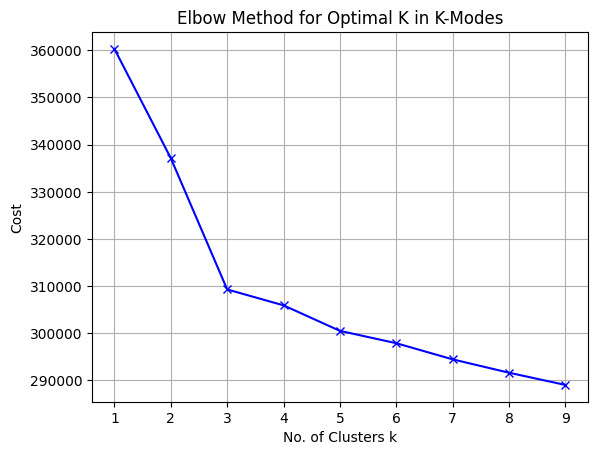

In [ ]:
#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [ ]:
# Construimos el modelo con 3 clusters

kmode_3 = KModes(n_clusters=3) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_3 = kmode_3.fit_predict(df_filtrado_copy)
clusters_3

array([0, 2, 2, ..., 2, 0, 1], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels3 = df_filtrado_copy.copy()
df_labels3.insert(2,"cluster_labels", clusters_3)
df_labels3

,prov_fall,edad,cluster_labels,sexo,anio_fall,lc1
2,Guayas,10,0,Hombre,2006,46 Influenza y neumonía
6,Pichincha,3,2,Mujer,2002,4 Enfermedades inmunoprevenibles
12,Cañar,16,2,Mujer,2001,63 Lesiones autoinflingidas intencionalmente (...
17,Azuay,2,1,Hombre,2000,55 Ciertas afecciones originadas en el período...
20,Guayas,1,2,Mujer,2006,55 Ciertas afecciones originadas en el período...
...,...,...,...,...,...,...
396434,Azuay,47,0,Hombre,2016,26 Diabetes Mellitus
396439,Pichincha,21,1,Mujer,2012,27 Desnutrición y anemias nutricionales
396442,Azuay,50,2,Mujer,2003,42 Enfermedades cerebrovasculares
396443,Pichincha,50,0,Hombre,2019,57 Accidentes de transporte terrestre


In [ ]:
# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels3.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=5000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 3: 0.10073668


In [ ]:
# Aplicamos MCA para reducir la dimensionalidad del dataset original

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93683 entries, 2 to 396445
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prov_fall  93683 non-null  object
 1   edad       93683 non-null  int32 
 2   sexo       93683 non-null  object
 3   anio_fall  93683 non-null  int32 
 4   lc1        93683 non-null  object
 5   mes        93683 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 5.9+ MB


In [ ]:
# Transformamos las variables no categóricas a variables tipo dummy

df_categorical = pd.get_dummies(df_clean)
df_categorical

,edad,anio_fall,mes,prov_fall_Azuay,prov_fall_Bolívar,prov_fall_Carchi,prov_fall_Cañar,prov_fall_Chimborazo,prov_fall_Cotopaxi,prov_fall_El Oro,...,lc1_57 Accidentes de transporte terrestre,lc1_58 Caidas accidentales,lc1_6 Septicemia,lc1_60 Ahogamiento y sumersión accidentales,lc1_61 Accidentes que obstruyen la respiración,lc1_62 Envenenamiento accidental,lc1_63 Lesiones autoinflingidas intencionalmente (Suicidio),lc1_7 Enfermedad por virus de la inmunodeficiencia (VIH),lc1_8 Neoplasia maligna del esófago,lc1_9 Neoplasia maligna del estómago
2,10,2006,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3,2002,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,16,2001,8,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17,2,2000,7,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,1,2006,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396434,47,2016,10,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396439,21,2012,11,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396442,50,2003,11,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396443,50,2019,11,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_categoricalCopy = df_categorical.sample(n=20000, random_state=1)

# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categoricalCopy)
mca

# Transforme el conjunto de datos (esto le dará las
# coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categoricalCopy)
mca_coordinates

,0,1
320813,-0.210284,-0.116308
96820,-0.050104,0.297180
68239,-0.081377,-0.090480
228364,-0.045897,-0.184317
238556,-0.228091,-0.014997
...,...,...
195834,0.251029,-0.082047
130222,0.198576,0.185913
150860,0.185536,-0.136649
191627,-0.067657,0.224628


In [ ]:
# Agregamos una columna con la etiqueta de los clusters. K = 3

mca_coordinates['cluster_labels'] = df_labels3['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
320813,-0.210284,-0.116308,0
96820,-0.050104,0.297180,1
68239,-0.081377,-0.090480,0
228364,-0.045897,-0.184317,0
238556,-0.228091,-0.014997,0


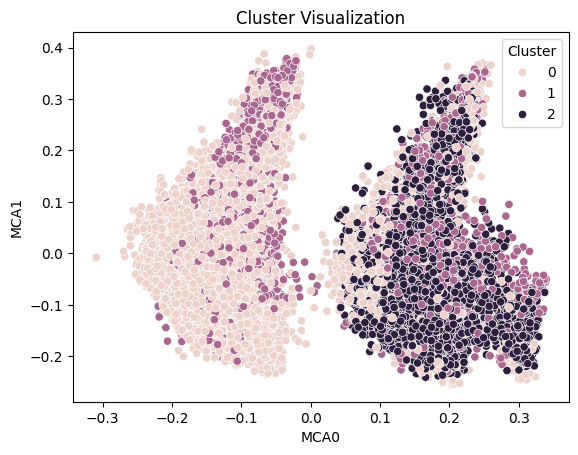

In [ ]:
# Dibuja el diagrama de dispersión coloreando los puntos por grupo.
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],
                y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

In [ ]:
# Construimos el modelo con 5 clusters

kmode_5 = KModes(n_clusters=5) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_5 = kmode_5.fit_predict(df_filtrado_copy)
clusters_5

array([0, 2, 2, ..., 2, 0, 1], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels5 = df_filtrado_copy.copy()
df_labels5.insert(2,"cluster_labels", clusters_5)
df_labels5

,prov_fall,edad,cluster_labels,sexo,anio_fall,lc1
2,Guayas,10,0,Hombre,2006,46 Influenza y neumonía
6,Pichincha,3,2,Mujer,2002,4 Enfermedades inmunoprevenibles
12,Cañar,16,2,Mujer,2001,63 Lesiones autoinflingidas intencionalmente (...
17,Azuay,2,1,Hombre,2000,55 Ciertas afecciones originadas en el período...
20,Guayas,1,2,Mujer,2006,55 Ciertas afecciones originadas en el período...
...,...,...,...,...,...,...
396434,Azuay,47,0,Hombre,2016,26 Diabetes Mellitus
396439,Pichincha,21,1,Mujer,2012,27 Desnutrición y anemias nutricionales
396442,Azuay,50,2,Mujer,2003,42 Enfermedades cerebrovasculares
396443,Pichincha,50,0,Hombre,2019,57 Accidentes de transporte terrestre


In [ ]:
# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels5.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=5000, random_state=40)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 5:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 5: 0.03535761


In [ ]:
# Aplicamos MCA para reducir la dimensionalidad del dataset original

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93683 entries, 2 to 396445
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prov_fall  93683 non-null  object
 1   edad       93683 non-null  int32 
 2   sexo       93683 non-null  object
 3   anio_fall  93683 non-null  int32 
 4   lc1        93683 non-null  object
 5   mes        93683 non-null  int32 
dtypes: int32(3), object(3)
memory usage: 5.9+ MB


In [ ]:
# Transformamos las variables no categóricas a variables tipo dummy

df_categorical = pd.get_dummies(df_clean)
df_categorical

,edad,anio_fall,mes,prov_fall_Azuay,prov_fall_Bolívar,prov_fall_Carchi,prov_fall_Cañar,prov_fall_Chimborazo,prov_fall_Cotopaxi,prov_fall_El Oro,...,lc1_57 Accidentes de transporte terrestre,lc1_58 Caidas accidentales,lc1_6 Septicemia,lc1_60 Ahogamiento y sumersión accidentales,lc1_61 Accidentes que obstruyen la respiración,lc1_62 Envenenamiento accidental,lc1_63 Lesiones autoinflingidas intencionalmente (Suicidio),lc1_7 Enfermedad por virus de la inmunodeficiencia (VIH),lc1_8 Neoplasia maligna del esófago,lc1_9 Neoplasia maligna del estómago
2,10,2006,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,3,2002,9,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,16,2001,8,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
17,2,2000,7,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,1,2006,7,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396434,47,2016,10,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396439,21,2012,11,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396442,50,2003,11,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396443,50,2019,11,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_categoricalCopy = df_categorical.sample(n=20000, random_state=1)

# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categoricalCopy)
mca

MCA()

In [ ]:
# Transforme el conjunto de datos (esto le dará las
# coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categoricalCopy)
mca_coordinates

,0,1
320813,-0.210027,-0.118400
96820,-0.050195,0.298956
68239,-0.081308,-0.091011
228364,-0.046124,-0.184786
238556,-0.228225,-0.015479
...,...,...
195834,0.250781,-0.082208
130222,0.198567,0.188555
150860,0.185583,-0.137718
191627,-0.067870,0.224722


In [ ]:
# Agregamos una columna con la etiqueta de los clusters. K = 5

mca_coordinates['cluster_labels'] = df_labels5['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
320813,-0.210027,-0.118400,4
96820,-0.050195,0.298956,1
68239,-0.081308,-0.091011,0
228364,-0.046124,-0.184786,0
238556,-0.228225,-0.015479,0


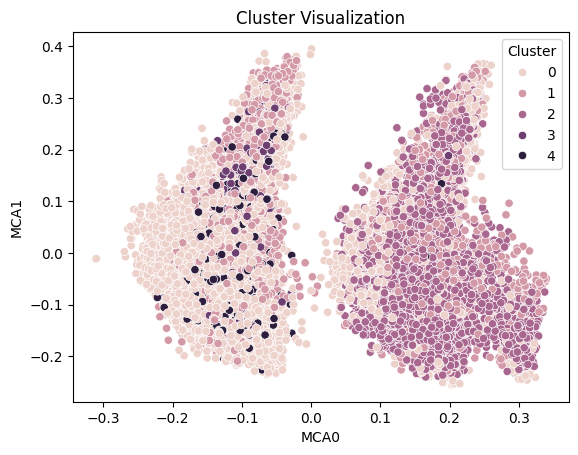

In [ ]:
# Dibuja el diagrama de dispersión coloreando los puntos por grupo.
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],
                y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

<h1><strong>🟨 MODELO NÚMERO 4: MUESTRA DE 30% Y TRANSFORMACIÓN DE VARIABLES</h1>

In [ ]:
# Sacando una muestra aleatoria del 20% de los datos
sample_df = df.sample(frac=0.30, random_state=7)  # random_state es una semilla para la reproducibilidad
sample_df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
1177163,Guayas,Guayaquil,Guayaquil,2011.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C90 Mieloma múltiple y tumores malignos de c...,C90 Mieloma múltiple y tumores malignos de c...,044 Mieloma multiple y tumores malignos de cél...,042 Mieloma múltiple y tumores malig de célula...,016 Tumores [neoplasias],018 Resto de tumores malignos,C900 Mieloma múltiple,"24 Neoplasia maligna del tejido linfático, hem..."
125559,Guayas,Guayaquil,Guayaquil,1992.0,Diciembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
901070,Los Ríos,Palenque,Palenque,2006.0,Julio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,"J18 Neumonía, organismo no especificado","J18 Neumonía, organismo no especificado",074 Neumonia,059 Neumonia,031 Enfermedades del sistema respiratorio,032 Neumonía,"J189 Neumonía, no especificada",46 Influenza y neumonía
1850553,Pastaza,Pastaza,Puyo,2020.0,Septiembre,28.0,2020-09-28,Ecuatoriana,Ecuador,Mujer,...,Urbana,Urbano,R54 Senilidad,R54 Senilidad,"094 Sintomas, signos y hallazgos anormales cl...","071 Sintoms,signs y hallz anorm cli.y d.lab, n...","056 Síntomas, signos y hallazgos anormales","058 Otros síntomas, signos y hallazgos anormal...",R54 Senilidad,99 Causas mal definidas
1662890,Manabí,Portoviejo,18 de Octubre,2018.0,Agosto,6.0,2018-08-06,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,C18 Tumor maligno del colon,C18 Tumor maligno del colon,030 Tumor maligno del colon del recto y del ano,"028 Tumor maligno del colon, del recto y del ano",016 Tumores [neoplasias],018 Resto de tumores malignos,"C189 Tumor maligno del colon, parte no especi...","10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81848,Loja,Loja,Santiago,1991.0,Agosto,NaN,NaN,NaN,,Mujer,...,Rural,Rural,,,999,999,999,,,NaN
1095120,Azuay,Cuenca,Cuenca,2010.0,Agosto,NaN,NaN,NaN,,Mujer,...,Rural,Rural,X59 Exposición a factores no especificados,X59 Exposición a factores no especificados,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X599 Exposición a factores no especificados q...,88 Resto de causas
655524,Los Ríos,Quevedo,Quevedo,2002.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,P28 Otros problemas respiratorios del recién...,P28 Otros problemas respiratorios del recién...,092 Ciertas afecciones originadas en el period...,069 Ciertas afecciones originadas en el period...,037 Ciertas afecciones originadas en el períod...,044 Otras afecciones respiratorias del recién ...,P285 Insuficiencia respiratoria del recién na...,55 Ciertas afecciones originadas en el período...
311561,Azuay,Cuenca,Cuenca,1996.0,Enero,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN


In [ ]:
sample_df[["prov_fall", "edad", "sexo","anio_fall","lc1"]].to_csv("muestra_30.csv", index=False)
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_30.csv')
df

,prov_fall,edad,sexo,anio_fall,lc1
0,Guayas,64.0,Hombre,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,1992.0,NaN
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía
3,Pastaza,95.0,Mujer,2020.0,99 Causas mal definidas
4,Manabí,85.0,Hombre,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...
594679,Loja,91.0,Mujer,1991.0,NaN
594680,Azuay,46.0,Mujer,2010.0,88 Resto de causas
594681,Los Ríos,2.0,Hombre,2002.0,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,Hombre,1996.0,NaN


In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0'
]
# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_clean = df[~df['lc1'].isin(palabras_a_eliminar)]
df_clean

,prov_fall,edad,sexo,anio_fall,lc1
0,Guayas,64.0,Hombre,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,1992.0,NaN
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía
4,Manabí,85.0,Hombre,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,88.0,Mujer,2007.0,42 Enfermedades cerebrovasculares
...,...,...,...,...,...
594677,Pastaza,72.0,Hombre,2020.0,47 Enfermedades crónicas de las vías respirato...
594679,Loja,91.0,Mujer,1991.0,NaN
594681,Los Ríos,2.0,Hombre,2002.0,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,Hombre,1996.0,NaN


In [ ]:
df_clean = df[df["edad"] <= 60]
df_clean

,prov_fall,edad,sexo,anio_fall,lc1
2,Guayas,10.0,Hombre,2006.0,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,2002.0,4 Enfermedades inmunoprevenibles
8,Guayas,28.0,Hombre,2004.0,64 Agresiones (Homicidios)
10,Tungurahua,8.0,Mujer,1990.0,NaN
12,Cañar,16.0,Mujer,2001.0,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...,...
594678,Guayas,29.0,Mujer,2020.0,99 Causas mal definidas
594680,Azuay,46.0,Mujer,2010.0,88 Resto de causas
594681,Los Ríos,2.0,Hombre,2002.0,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,Hombre,1996.0,NaN


In [ ]:
#Cambio de tipo de dato
df_clean[["edad", "anio_fall"]] = df_clean[["edad", "anio_fall"]].astype(int)

C:\Users\byalj\AppData\Local\Temp\ipykernel_10500\3658905935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[["edad", "anio_fall"]] = df_clean[["edad", "anio_fall"]].astype(int)


In [ ]:
# Reemplazamos los valores NaN por "Causa no determinada"
df_clean.fillna("100 Causa no determinada", inplace=True)
df_clean

C:\Users\byalj\AppData\Local\Temp\ipykernel_10500\623020045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.fillna("100 Causa no determinada", inplace=True)


,prov_fall,edad,sexo,anio_fall,lc1
2,Guayas,10,Hombre,2006,46 Influenza y neumonía
6,Pichincha,3,Mujer,2002,4 Enfermedades inmunoprevenibles
8,Guayas,28,Hombre,2004,64 Agresiones (Homicidios)
10,Tungurahua,8,Mujer,1990,100 Causa no determinada
12,Cañar,16,Mujer,2001,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...,...
594678,Guayas,29,Mujer,2020,99 Causas mal definidas
594680,Azuay,46,Mujer,2010,88 Resto de causas
594681,Los Ríos,2,Hombre,2002,55 Ciertas afecciones originadas en el período...
594682,Azuay,19,Hombre,1996,100 Causa no determinada


In [ ]:
#COPIA DEL DATAFRAME:
df_clean_copy = df_clean.copy()

In [ ]:
# Instalar la librería k-modes
!pip install kmodes

# Importamos la función k-modes
from kmodes.kmodes import KModes


# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_clean_copy)
  cost_red.append(kmode_red.cost_)

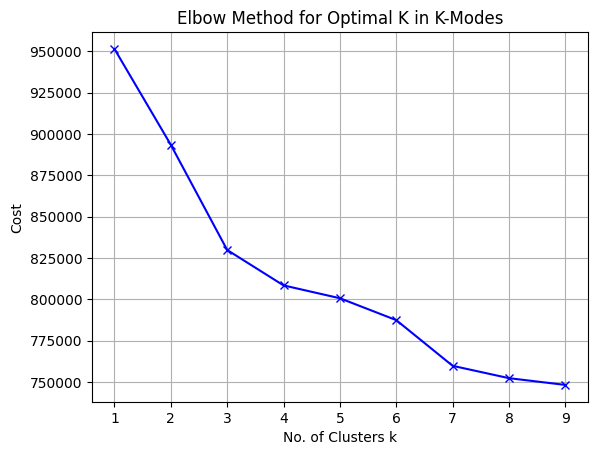

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [ ]:
# Construimos el modelo con 3 clusters

kmode_3 = KModes(n_clusters=3) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_3 = kmode_3.fit_predict(df_clean_copy)
clusters_3

array([0, 2, 0, ..., 1, 0, 0], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels3 = df_clean_copy.copy()
df_labels3.insert(2,"cluster_labels", clusters_3)
df_labels3

,prov_fall,edad,cluster_labels,sexo,anio_fall,lc1
2,Guayas,10,0,Hombre,2006,46 Influenza y neumonía
6,Pichincha,3,2,Mujer,2002,4 Enfermedades inmunoprevenibles
8,Guayas,28,0,Hombre,2004,64 Agresiones (Homicidios)
10,Tungurahua,8,2,Mujer,1990,100 Causa no determinada
12,Cañar,16,2,Mujer,2001,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...,...,...
594678,Guayas,29,0,Mujer,2020,99 Causas mal definidas
594680,Azuay,46,1,Mujer,2010,88 Resto de causas
594681,Los Ríos,2,1,Hombre,2002,55 Ciertas afecciones originadas en el período...
594682,Azuay,19,0,Hombre,1996,100 Causa no determinada


In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels3.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=50600, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 3: 0.06055779


<h1>NUEVO CLUSTER 7</h1>

In [ ]:
# Construimos el modelo con 7 clusters

kmode_7 = KModes(n_clusters=7) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_7 = kmode_7.fit_predict(df_clean_copy)
clusters_7

array([0, 2, 0, ..., 1, 0, 0], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels7 = df_clean_copy.copy()
df_labels7.insert(2,"cluster_labels", clusters_7)
df_labels7

,prov_fall,edad,cluster_labels,sexo,anio_fall,lc1
2,Guayas,10.0,0,Hombre,2006.0,46 Influenza y neumonía
6,Pichincha,3.0,2,Mujer,2002.0,4 Enfermedades inmunoprevenibles
8,Guayas,28.0,0,Hombre,2004.0,64 Agresiones (Homicidios)
10,Tungurahua,8.0,2,Mujer,1990.0,100 Causa no determinada
12,Cañar,16.0,2,Mujer,2001.0,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...,...,...
594678,Guayas,29.0,6,Mujer,2020.0,99 Causas mal definidas
594680,Azuay,46.0,6,Mujer,2010.0,88 Resto de causas
594681,Los Ríos,2.0,1,Hombre,2002.0,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,0,Hombre,1996.0,100 Causa no determinada


In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels7.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=15000, random_state=40)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 7:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 7: 0.018927716


In [ ]:
# Construimos el modelo con 4 clusters

kmode_4 = KModes(n_clusters=4) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_4 = kmode_4.fit_predict(df_clean_copy)
clusters_4

array([0, 2, 0, ..., 1, 0, 0], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels4 = df_clean_copy.copy()
df_labels4.insert(2,"cluster_labels", clusters_4)
df_labels4

,prov_fall,edad,cluster_labels,sexo,anio_fall,lc1
2,Guayas,10.0,0,Hombre,2006.0,46 Influenza y neumonía
6,Pichincha,3.0,2,Mujer,2002.0,4 Enfermedades inmunoprevenibles
8,Guayas,28.0,0,Hombre,2004.0,64 Agresiones (Homicidios)
10,Tungurahua,8.0,2,Mujer,1990.0,100 Causa no determinada
12,Cañar,16.0,2,Mujer,2001.0,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...,...,...
594678,Guayas,29.0,0,Mujer,2020.0,99 Causas mal definidas
594680,Azuay,46.0,1,Mujer,2010.0,88 Resto de causas
594681,Los Ríos,2.0,1,Hombre,2002.0,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,0,Hombre,1996.0,100 Causa no determinada


In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels4.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=15000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 4:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 4: 0.045209043


<h1><strong>🟨 MODELO NÚMERO 5: PRUEBAS</h1>

In [ ]:
# Sacando una muestra aleatoria del 20% de los datos
sample_df = df.sample(frac=0.20, random_state=7)  # random_state es una semilla para la reproducibilidad
sample_df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
1177163,Guayas,Guayaquil,Guayaquil,2011.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C90 Mieloma múltiple y tumores malignos de c...,C90 Mieloma múltiple y tumores malignos de c...,044 Mieloma multiple y tumores malignos de cél...,042 Mieloma múltiple y tumores malig de célula...,016 Tumores [neoplasias],018 Resto de tumores malignos,C900 Mieloma múltiple,"24 Neoplasia maligna del tejido linfático, hem..."
125559,Guayas,Guayaquil,Guayaquil,1992.0,Diciembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
901070,Los Ríos,Palenque,Palenque,2006.0,Julio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,"J18 Neumonía, organismo no especificado","J18 Neumonía, organismo no especificado",074 Neumonia,059 Neumonia,031 Enfermedades del sistema respiratorio,032 Neumonía,"J189 Neumonía, no especificada",46 Influenza y neumonía
1850553,Pastaza,Pastaza,Puyo,2020.0,Septiembre,28.0,2020-09-28,Ecuatoriana,Ecuador,Mujer,...,Urbana,Urbano,R54 Senilidad,R54 Senilidad,"094 Sintomas, signos y hallazgos anormales cl...","071 Sintoms,signs y hallz anorm cli.y d.lab, n...","056 Síntomas, signos y hallazgos anormales","058 Otros síntomas, signos y hallazgos anormal...",R54 Senilidad,99 Causas mal definidas
1662890,Manabí,Portoviejo,18 de Octubre,2018.0,Agosto,6.0,2018-08-06,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,C18 Tumor maligno del colon,C18 Tumor maligno del colon,030 Tumor maligno del colon del recto y del ano,"028 Tumor maligno del colon, del recto y del ano",016 Tumores [neoplasias],018 Resto de tumores malignos,"C189 Tumor maligno del colon, parte no especi...","10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204353,Pichincha,Distrito Metropolitano de Quito,Quito,2011.0,Agosto,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,F10 Trastornos mentales y del comportamiento...,F10 Trastornos mentales y del comportamiento...,056 Transtornos mentales y del comportamiento ...,048 Trastors mentls y del compor.debid.al us.d...,059 Todas las demás enfermedades,059 Todas las demás enfermedades,F102 Trastornos mentales y del comportamiento...,30 Trastornos mentales y del comportamiento po...
1212511,Tungurahua,Ambato,Ambato,2011.0,Abril,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,K85 Pancreatitis aguda,K85 Pancreatitis aguda,081 Resto de enfermedades del sistema digestivo,072 Todas las demas enfermedades,035 Enfermedades del sistema digestivo,035 Enfermedades del sistema digestivo,K85 Pancreatitis aguda,88 Resto de causas
1925323,Manabí,Jipijapa,San Lorenzo de Jipijapa,2021.0,Septiembre,1.0,2021-09-01,Ecuatoriana,Ecuador,Mujer,...,Rural,Rural,I67 Otras enfermedades cerebrovasculares,I67 Otras enfermedades cerebrovasculares,069 Enfermedades Cerebro vasculares,055 Enfermedades cerebro vasculares,030 Enfermedades del sistema circulatorio,030 Enfermedades del sistema circulatorio,I678 Otras enfermedades cerebrovasculares esp...,42 Enfermedades cerebrovasculares
1731036,Los Ríos,Quevedo,Siete de Octubre,2019.0,Enero,11.0,2019-01-11,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,J44 Otras enfermedades pulmonares obstructiv...,J44 Otras enfermedades pulmonares obstructiv...,076 Enfermedades crónicas de las vías resp inf...,061 Enfermedades crónicas de las vías resp. in...,031 Enfermedades del sistema respiratorio,034 Resto de enfermedades del sistema respirat...,"J449 Enfermedad pulmonar obstructiva crónica,...",47 Enfermedades crónicas de las vías respirato...


In [ ]:
sample_df[["prov_fall", "sexo","anio_fall","lc1"]].to_csv("muestra_20_test.csv", index=False)
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_20_test.csv')
df

,prov_fall,sexo,anio_fall,lc1
0,Guayas,Hombre,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,Hombre,1992.0,NaN
2,Guayas,Hombre,2006.0,46 Influenza y neumonía
3,Pastaza,Mujer,2020.0,99 Causas mal definidas
4,Manabí,Hombre,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...
396451,Pichincha,Hombre,2011.0,30 Trastornos mentales y del comportamiento po...
396452,Tungurahua,Hombre,2011.0,88 Resto de causas
396453,Manabí,Mujer,2021.0,42 Enfermedades cerebrovasculares
396454,Los Ríos,Hombre,2019.0,47 Enfermedades crónicas de las vías respirato...


In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0'
]
# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_clean = df[~df['lc1'].isin(palabras_a_eliminar)]
df_clean

,prov_fall,sexo,anio_fall,lc1
0,Guayas,Hombre,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,Hombre,1992.0,NaN
2,Guayas,Hombre,2006.0,46 Influenza y neumonía
4,Manabí,Hombre,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,Mujer,2007.0,42 Enfermedades cerebrovasculares
...,...,...,...,...
396450,El Oro,Mujer,2021.0,26 Diabetes Mellitus
396451,Pichincha,Hombre,2011.0,30 Trastornos mentales y del comportamiento po...
396453,Manabí,Mujer,2021.0,42 Enfermedades cerebrovasculares
396454,Los Ríos,Hombre,2019.0,47 Enfermedades crónicas de las vías respirato...


In [ ]:
# Reemplazamos los valores NaN por "Causa no determinada"
df_clean.fillna("100 Causa no determinada", inplace=True)
df_clean

C:\Users\fvela\AppData\Local\Temp\ipykernel_33392\623020045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.fillna("100 Causa no determinada", inplace=True)


,prov_fall,sexo,anio_fall,lc1
0,Guayas,Hombre,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,Hombre,1992.0,100 Causa no determinada
2,Guayas,Hombre,2006.0,46 Influenza y neumonía
4,Manabí,Hombre,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,Mujer,2007.0,42 Enfermedades cerebrovasculares
...,...,...,...,...
396450,El Oro,Mujer,2021.0,26 Diabetes Mellitus
396451,Pichincha,Hombre,2011.0,30 Trastornos mentales y del comportamiento po...
396453,Manabí,Mujer,2021.0,42 Enfermedades cerebrovasculares
396454,Los Ríos,Hombre,2019.0,47 Enfermedades crónicas de las vías respirato...


In [ ]:
#COPIA DEL DATAFRAME:
df_clean_copy = df_clean.copy()


In [ ]:

# Instalar la librería k-modes
#!pip install kmodes

# Importamos la función k-modes
from kmodes.kmodes import KModes


# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_clean_copy)
  cost_red.append(kmode_red.cost_)

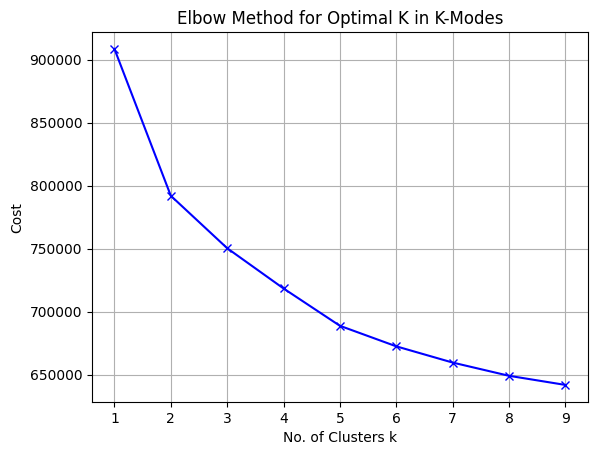

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [ ]:
# Construimos el modelo con 3 clusters

kmode_2 = KModes(n_clusters=2) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_2 = kmode_2.fit_predict(df_clean_copy)
clusters_2

array([0, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels2 = df_clean_copy.copy()
df_labels2.insert(2,"cluster_labels", clusters_2)
df_labels2

,prov_fall,sexo,cluster_labels,anio_fall,lc1
0,Guayas,Hombre,0,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,Hombre,0,1992.0,100 Causa no determinada
2,Guayas,Hombre,0,2006.0,46 Influenza y neumonía
4,Manabí,Hombre,0,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,Mujer,1,2007.0,42 Enfermedades cerebrovasculares
...,...,...,...,...,...
396450,El Oro,Mujer,1,2021.0,26 Diabetes Mellitus
396451,Pichincha,Hombre,0,2011.0,30 Trastornos mentales y del comportamiento po...
396453,Manabí,Mujer,1,2021.0,42 Enfermedades cerebrovasculares
396454,Los Ríos,Hombre,0,2019.0,47 Enfermedades crónicas de las vías respirato...


In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Convertir todas las columnas categóricas a strings
df_str = df_labels2.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=15000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 2: 0.15842174


<h2>NUEVO CLUSTER</h2>

In [ ]:
# Construimos el modelo con 3 clusters

kmode_3 = KModes(n_clusters=3) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_3 = kmode_3.fit_predict(df_clean_copy)
clusters_3

array([0, 0, 0, ..., 2, 0, 0], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels3 = df_clean_copy.copy()
df_labels3.insert(2,"cluster_labels", clusters_3)
df_labels3

,prov_fall,sexo,cluster_labels,anio_fall,lc1
0,Guayas,Hombre,0,2011.0,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,Hombre,0,1992.0,100 Causa no determinada
2,Guayas,Hombre,0,2006.0,46 Influenza y neumonía
4,Manabí,Hombre,0,2018.0,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,Mujer,1,2007.0,42 Enfermedades cerebrovasculares
...,...,...,...,...,...
396450,El Oro,Mujer,2,2021.0,26 Diabetes Mellitus
396451,Pichincha,Hombre,0,2011.0,30 Trastornos mentales y del comportamiento po...
396453,Manabí,Mujer,2,2021.0,42 Enfermedades cerebrovasculares
396454,Los Ríos,Hombre,0,2019.0,47 Enfermedades crónicas de las vías respirato...


In [ ]:
# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels3.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=20000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 3: 0.120745145


<h1><strong>🟨 MODELO NÚMERO 6: PRUEBAS (NUEVA VARIABLE => NACIONALIDAD)</h1>

In [ ]:
# Sacando una muestra aleatoria del 30% de los datos
sample_df = df.sample(frac=0.30, random_state=4)  # random_state es una semilla para la reproducibilidad
sample_df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
351418,Pichincha,Distrito Metropolitano de Quito,Quito,1996.0,Enero,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
340076,Imbabura,Otavalo,San José de Quichinche,1996.0,Marzo,NaN,NaN,NaN,,Hombre,...,Rural,Rural,,,999,999,999,,,NaN
296283,Manabí,Manta,Manta,1995.0,Diciembre,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,,,999,999,999,,,NaN
1227510,Chimborazo,Guamote,Palmira,2012.0,Noviembre,NaN,NaN,NaN,,Mujer,...,Rural,Rural,R06 Anormalidades de la respiración,R06 Anormalidades de la respiración,"094 Sintomas, signos y hallazgos anormales cl...","071 Sintoms,signs y hallz anorm cli.y d.lab, n...","056 Síntomas, signos y hallazgos anormales","058 Otros síntomas, signos y hallazgos anormal...",R068 Otras anormalidades de la respiración y ...,99 Causas mal definidas
1479346,Esmeraldas,Quinindé,Rosa Zarate (Quinindé),2016.0,Noviembre,17.0,2016-11-17,Ecuatoriana,,Mujer,...,Urbana,Rural,A49 Infección bacteriana de sitio no especif...,A49 Infección bacteriana de sitio no especif...,025 Resto de ciertas enfermedades infecciosas ...,024 Resto de ciertas enfermedades infecciosas ...,001 Ciertas enfermedades infecciosas y parasit...,015 Resto de ciertas enfermedades infecciosas ...,"A499 Infección bacteriana, no especificada",88 Resto de causas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034274,Santa Elena,Salinas,Salinas,2008.0,Octubre,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,E10 Diabetes mellitus insulinodependiente,E10 Diabetes mellitus insulinodependiente,052 Diabetes mellitus,046 Diabetes mellitus,"023 Enfermedades endocrinas, nutricionales y m...","025 Resto de enfermedades endocrinas, nutricio...","E105 Diabetes mellitus insulinodependiente, c...",26 Diabetes Mellitus
1774615,Pichincha,Distrito Metropolitano de Quito,Iñaquito,2020.0,Julio,8.0,2020-07-08,Ecuatoriana,Ecuador,Mujer,...,Urbana,Urbano,U07,U07 COVID 19 Confirmado y sospechozo,104,081,061,068,"U071 COVID-19, virus identificado","COVID-19, virus identificado"
1518830,Manabí,Sucre,Bahía de Caráquez,2016.0,Septiembre,28.0,2016-09-28,Ecuatoriana,,Hombre,...,Urbana,Urbano,C34 Tumor maligno de los bronquios y del pulmón,C34 Tumor maligno de los bronquios y del pulmón,034 Tumor maligno de la tráquea de los bronqui...,"032 Tumor maligno de la tráquea, de los bronq ...",016 Tumores [neoplasias],018 Resto de tumores malignos,C349 Tumor maligno de los bronquios o del pul...,"15 Neoplasia maligna de la tráquea, bronquios ..."
1144852,Pichincha,Distrito Metropolitano de Quito,Quito,2010.0,Septiembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C22 Tumor maligno del hígado y de las vías b...,C22 Tumor maligno del hígado y de las vías b...,031 Tumor maligno del hígado y de las vías bil...,029 Tumor maligno del hígado y de las vías bil...,016 Tumores [neoplasias],018 Resto de tumores malignos,"C229 Tumor maligno del hígado, no especificado",11 Neoplasia maligna del hígado y de las vías ...


In [ ]:
sample_df[["prov_fall", "nac_fall", "sexo","anio_fall","lc1"]].to_csv("muestra_20_2.csv", index=False)
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_20_2.csv')
df

,prov_fall,nac_fall,sexo,anio_fall,lc1
0,Pichincha,NaN,Hombre,1996.0,NaN
1,Imbabura,NaN,Hombre,1996.0,NaN
2,Manabí,NaN,Mujer,1995.0,NaN
3,Chimborazo,NaN,Mujer,2012.0,99 Causas mal definidas
4,Esmeraldas,Ecuatoriana,Mujer,2016.0,88 Resto de causas
...,...,...,...,...,...
594679,Santa Elena,NaN,Mujer,2008.0,26 Diabetes Mellitus
594680,Chimborazo,Ecuatoriana,Mujer,2020.0,"COVID-19, virus identificado"
594681,Manabí,Ecuatoriana,Hombre,2016.0,"15 Neoplasia maligna de la tráquea, bronquios ..."
594682,Pichincha,NaN,Hombre,2010.0,11 Neoplasia maligna del hígado y de las vías ...


In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0'
]
# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_clean = df[~df['lc1'].isin(palabras_a_eliminar)]
df_clean

,prov_fall,nac_fall,sexo,anio_fall,lc1
0,Pichincha,NaN,Hombre,1996.0,NaN
1,Imbabura,NaN,Hombre,1996.0,NaN
2,Manabí,NaN,Mujer,1995.0,NaN
5,Guayas,NaN,Mujer,2002.0,11 Neoplasia maligna del hígado y de las vías ...
6,Pichincha,Ecuatoriana,Hombre,2018.0,25 Neoplasias benignas in situ y de comportami...
...,...,...,...,...,...
594678,Guayas,NaN,Hombre,2007.0,55 Ciertas afecciones originadas en el período...
594679,Santa Elena,NaN,Mujer,2008.0,26 Diabetes Mellitus
594681,Manabí,Ecuatoriana,Hombre,2016.0,"15 Neoplasia maligna de la tráquea, bronquios ..."
594682,Pichincha,NaN,Hombre,2010.0,11 Neoplasia maligna del hígado y de las vías ...


In [ ]:

# Reemplazar valores nulos en la variable nac_fall por "Sin información"
df_clean['lc1'].fillna("100 Causa no determinada", inplace=True)
df_clean = df.dropna(subset=["nac_fall"])
df_clean

C:\Users\fvela\AppData\Local\Temp\ipykernel_18952\3672993781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['lc1'].fillna("100 Causa no determinada", inplace=True)
C:\Users\fvela\AppData\Local\Temp\ipykernel_18952\3672993781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lc1'].fillna("100 Causa no determinada", inp

,prov_fall,nac_fall,sexo,anio_fall,lc1
4,Esmeraldas,Ecuatoriana,Mujer,2016.0,88 Resto de causas
6,Pichincha,Ecuatoriana,Hombre,2018.0,25 Neoplasias benignas in situ y de comportami...
10,Santa Elena,Ecuatoriana,Hombre,2020.0,"COVID-19, virus no identificado"
12,Pichincha,Ecuatoriana,Mujer,2018.0,88 Resto de causas
13,Guayas,Ecuatoriana,Mujer,2014.0,11 Neoplasia maligna del hígado y de las vías ...
...,...,...,...,...,...
594674,Guayas,Ecuatoriana,Mujer,2020.0,35 Enfermedades isquémicas del corazón
594677,Guayas,Ecuatoriana,Hombre,2021.0,46 Influenza y neumonía
594680,Chimborazo,Ecuatoriana,Mujer,2020.0,"COVID-19, virus identificado"
594681,Manabí,Ecuatoriana,Hombre,2016.0,"15 Neoplasia maligna de la tráquea, bronquios ..."


In [ ]:
#COPIA DEL DATAFRAME:
df_clean_copy = df_clean.copy()


In [ ]:
# Instalar la librería k-modes
#!pip install kmodes

# Importamos la función k-modes
from kmodes.kmodes import KModes


# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_clean_copy)
  cost_red.append(kmode_red.cost_)

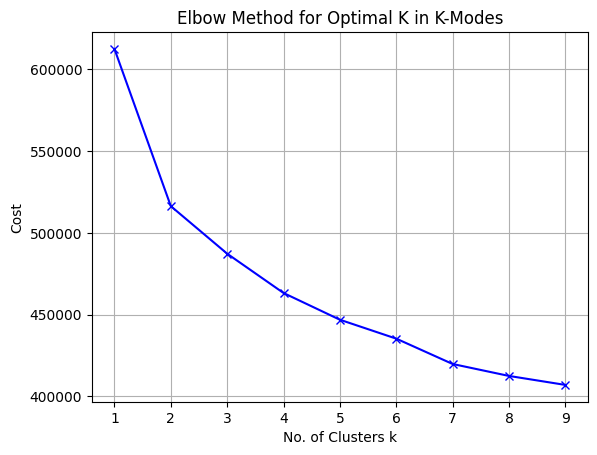

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [ ]:
# Construimos el modelo con 3 clusters

kmode_3 = KModes(n_clusters=3) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_3 = kmode_3.fit_predict(df_clean_copy)
clusters_3

array([1, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels3 = df_clean_copy.copy()
df_labels3.insert(2,"cluster_labels", clusters_3)
df_labels3

,prov_fall,nac_fall,cluster_labels,sexo,anio_fall,lc1
4,Esmeraldas,Ecuatoriana,1,Mujer,2016.0,88 Resto de causas
6,Pichincha,Ecuatoriana,0,Hombre,2018.0,25 Neoplasias benignas in situ y de comportami...
10,Santa Elena,Ecuatoriana,0,Hombre,2020.0,"COVID-19, virus no identificado"
12,Pichincha,Ecuatoriana,1,Mujer,2018.0,88 Resto de causas
13,Guayas,Ecuatoriana,2,Mujer,2014.0,11 Neoplasia maligna del hígado y de las vías ...
...,...,...,...,...,...,...
594674,Guayas,Ecuatoriana,0,Mujer,2020.0,35 Enfermedades isquémicas del corazón
594677,Guayas,Ecuatoriana,0,Hombre,2021.0,46 Influenza y neumonía
594680,Chimborazo,Ecuatoriana,0,Mujer,2020.0,"COVID-19, virus identificado"
594681,Manabí,Ecuatoriana,0,Hombre,2016.0,"15 Neoplasia maligna de la tráquea, bronquios ..."


In [ ]:
# Calculo de Average Silhouette Score
import gower
from sklearn.metrics import silhouette_score
import pandas as pd

# Convertir todas las columnas categóricas a strings
df_str = df_labels3.astype(str)

# Sacamos una muestra del 20% de los datos
sample_size = int(len(df_str) * 0.2)
df_sample = df_str.sample(n=sample_size, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_sample.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_sample['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 3:", silhouette_avg_gower)


Average Categorical Silhouette Score con K = 3: 0.110984854


<h2>7 CLUSTERS </h2>

In [ ]:
# Construimos el modelo con 3 clusters

kmode_7 = KModes(n_clusters=7) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_7 = kmode_7.fit_predict(df_clean_copy)
clusters_7


array([1, 3, 0, ..., 6, 4, 1], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels7 = df_clean_copy.copy()
df_labels7.insert(2,"cluster_labels", clusters_7)
df_labels7

,prov_fall,nac_fall,cluster_labels,sexo,anio_fall,lc1
4,Esmeraldas,Ecuatoriana,1,Mujer,2016.0,88 Resto de causas
6,Pichincha,Ecuatoriana,3,Hombre,2018.0,25 Neoplasias benignas in situ y de comportami...
10,Santa Elena,Ecuatoriana,0,Hombre,2020.0,"COVID-19, virus no identificado"
12,Pichincha,Ecuatoriana,1,Mujer,2018.0,88 Resto de causas
13,Guayas,Ecuatoriana,2,Mujer,2014.0,11 Neoplasia maligna del hígado y de las vías ...
...,...,...,...,...,...,...
594674,Guayas,Ecuatoriana,0,Mujer,2020.0,35 Enfermedades isquémicas del corazón
594677,Guayas,Ecuatoriana,0,Hombre,2021.0,46 Influenza y neumonía
594680,Chimborazo,Ecuatoriana,6,Mujer,2020.0,"COVID-19, virus identificado"
594681,Manabí,Ecuatoriana,4,Hombre,2016.0,"15 Neoplasia maligna de la tráquea, bronquios ..."


In [ ]:

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels3.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=20000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 7:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 7: 0.11188471


<h1><strong>🟨 MODELO NÚMERO 7: PRUEBAS CON VARIABLES TRANSFORMADAS Y MUESTRA 30%</h1>

In [ ]:
#Instalamos la librería "pyreadstat" en caso de no tenerla
import pandas as pd
import pyreadstat

df = pd.read_spss("EDG_1990_2021.sav")
df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
0,Loja,Loja,Loja,1990.0,Julio,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,,,999,999,999,,,NaN
1,Loja,Loja,Loja,1990.0,Junio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
2,Loja,Loja,Loja,1990.0,Septiembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
3,Azuay,Cuenca,Cuenca,1990.0,Agosto,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
4,Azuay,Cuenca,Cuenca,1990.0,Agosto,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,,,999,999,999,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982276,Manabí,Jama,Jama,2021.0,Diciembre,16.0,2021-12-16,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,Y87 Secuelas de lesiones autoinfligidas inte...,Y87 Secuelas de lesiones autoinfligidas inte...,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y872 Secuelas de eventos de intención no dete...,88 Resto de causas
1982277,Chimborazo,Alausí,Alausí,2021.0,Marzo,23.0,2021-03-23,Ecuatoriana,Ecuador,Hombre,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982278,El Oro,El Guabo,El Guabo,2021.0,Noviembre,11.0,2021-11-11,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982279,Loja,Espíndola,Amaluza,2021.0,Agosto,30.0,2021-08-30,Ecuatoriana,Ecuador,Mujer,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas


In [ ]:
# Sacando una muestra aleatoria del 30% de los datos
sample_df = df.sample(frac=0.30, random_state=7)  # random_state es una semilla para la reproducibilidad
sample_df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
1177163,Guayas,Guayaquil,Guayaquil,2011.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C90 Mieloma múltiple y tumores malignos de c...,C90 Mieloma múltiple y tumores malignos de c...,044 Mieloma multiple y tumores malignos de cél...,042 Mieloma múltiple y tumores malig de célula...,016 Tumores [neoplasias],018 Resto de tumores malignos,C900 Mieloma múltiple,"24 Neoplasia maligna del tejido linfático, hem..."
125559,Guayas,Guayaquil,Guayaquil,1992.0,Diciembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
901070,Los Ríos,Palenque,Palenque,2006.0,Julio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,"J18 Neumonía, organismo no especificado","J18 Neumonía, organismo no especificado",074 Neumonia,059 Neumonia,031 Enfermedades del sistema respiratorio,032 Neumonía,"J189 Neumonía, no especificada",46 Influenza y neumonía
1850553,Pastaza,Pastaza,Puyo,2020.0,Septiembre,28.0,2020-09-28,Ecuatoriana,Ecuador,Mujer,...,Urbana,Urbano,R54 Senilidad,R54 Senilidad,"094 Sintomas, signos y hallazgos anormales cl...","071 Sintoms,signs y hallz anorm cli.y d.lab, n...","056 Síntomas, signos y hallazgos anormales","058 Otros síntomas, signos y hallazgos anormal...",R54 Senilidad,99 Causas mal definidas
1662890,Manabí,Portoviejo,18 de Octubre,2018.0,Agosto,6.0,2018-08-06,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,C18 Tumor maligno del colon,C18 Tumor maligno del colon,030 Tumor maligno del colon del recto y del ano,"028 Tumor maligno del colon, del recto y del ano",016 Tumores [neoplasias],018 Resto de tumores malignos,"C189 Tumor maligno del colon, parte no especi...","10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81848,Loja,Loja,Santiago,1991.0,Agosto,NaN,NaN,NaN,,Mujer,...,Rural,Rural,,,999,999,999,,,NaN
1095120,Azuay,Cuenca,Cuenca,2010.0,Agosto,NaN,NaN,NaN,,Mujer,...,Rural,Rural,X59 Exposición a factores no especificados,X59 Exposición a factores no especificados,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,X599 Exposición a factores no especificados q...,88 Resto de causas
655524,Los Ríos,Quevedo,Quevedo,2002.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,P28 Otros problemas respiratorios del recién...,P28 Otros problemas respiratorios del recién...,092 Ciertas afecciones originadas en el period...,069 Ciertas afecciones originadas en el period...,037 Ciertas afecciones originadas en el períod...,044 Otras afecciones respiratorias del recién ...,P285 Insuficiencia respiratoria del recién na...,55 Ciertas afecciones originadas en el período...
311561,Azuay,Cuenca,Cuenca,1996.0,Enero,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN


In [ ]:
sample_df[["prov_fall", "edad", "sexo","lc1"]].to_csv("muestra_50.csv", index=False)
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_50.csv')
df

,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,NaN
2,Guayas,10.0,Hombre,46 Influenza y neumonía
3,Pastaza,95.0,Mujer,99 Causas mal definidas
4,Manabí,85.0,Hombre,"10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...
594679,Loja,91.0,Mujer,NaN
594680,Azuay,46.0,Mujer,88 Resto de causas
594681,Los Ríos,2.0,Hombre,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,Hombre,NaN


In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0',
    '100'
]
# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_clean = df[~df['lc1'].isin(palabras_a_eliminar)]
df_clean

,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,NaN
2,Guayas,10.0,Hombre,46 Influenza y neumonía
4,Manabí,85.0,Hombre,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,88.0,Mujer,42 Enfermedades cerebrovasculares
...,...,...,...,...
594677,Pastaza,72.0,Hombre,47 Enfermedades crónicas de las vías respirato...
594679,Loja,91.0,Mujer,NaN
594681,Los Ríos,2.0,Hombre,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,Hombre,NaN


In [ ]:
df_clean = df[df["edad"] <= 65]
df_clean

,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
2,Guayas,10.0,Hombre,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,4 Enfermedades inmunoprevenibles
8,Guayas,28.0,Hombre,64 Agresiones (Homicidios)
10,Tungurahua,8.0,Mujer,NaN
...,...,...,...,...
594678,Guayas,29.0,Mujer,99 Causas mal definidas
594680,Azuay,46.0,Mujer,88 Resto de causas
594681,Los Ríos,2.0,Hombre,55 Ciertas afecciones originadas en el período...
594682,Azuay,19.0,Hombre,NaN


In [ ]:
df_clean.isnull().sum()

prov_fall        0
edad             0
sexo             0
lc1          64538
dtype: int64

In [ ]:
#Eliminamos valores Null del dataframe
df_clean = df_clean.dropna(axis=0)
df_clean

,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
2,Guayas,10.0,Hombre,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,4 Enfermedades inmunoprevenibles
8,Guayas,28.0,Hombre,64 Agresiones (Homicidios)
12,Cañar,16.0,Mujer,63 Lesiones autoinflingidas intencionalmente (...
...,...,...,...,...
594674,Pichincha,33.0,Hombre,57 Accidentes de transporte terrestre
594675,Chimborazo,2.0,Hombre,99 Causas mal definidas
594678,Guayas,29.0,Mujer,99 Causas mal definidas
594680,Azuay,46.0,Mujer,88 Resto de causas


In [ ]:
df_clean.isnull().sum()

prov_fall    0
edad         0
sexo         0
lc1          0
dtype: int64

In [ ]:
import pandas as pd

# Define the bins
bins = [-1, 13, 20, 45, 65]  # adjust these values according to your data

# Define the labels
labels = ['Niño', 'Joven', 'Adulto', 'Adulto Mayor']

# Create a new column "Edad_Categoría"
df_clean['Edad_Categoría'] = pd.cut(df['edad'], bins=bins, labels=labels)

# Delete the original 'edad' column
del df_clean['edad']

# Print the resulting dataframe
df_clean

C:\Users\byalj\AppData\Local\Temp\ipykernel_3712\1738862776.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Edad_Categoría'] = pd.cut(df['edad'], bins=bins, labels=labels)


,prov_fall,sexo,lc1,Edad_Categoría
0,Guayas,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Adulto Mayor
2,Guayas,Hombre,46 Influenza y neumonía,Niño
6,Pichincha,Mujer,4 Enfermedades inmunoprevenibles,Niño
8,Guayas,Hombre,64 Agresiones (Homicidios),Adulto
12,Cañar,Mujer,63 Lesiones autoinflingidas intencionalmente (...,Joven
...,...,...,...,...
594674,Pichincha,Hombre,57 Accidentes de transporte terrestre,Adulto
594675,Chimborazo,Hombre,99 Causas mal definidas,Niño
594678,Guayas,Mujer,99 Causas mal definidas,Adulto
594680,Azuay,Mujer,88 Resto de causas,Adulto Mayor


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225835 entries, 0 to 594681
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   prov_fall       225835 non-null  object  
 1   sexo            225835 non-null  object  
 2   lc1             225835 non-null  object  
 3   Edad_Categoría  225835 non-null  category
dtypes: category(1), object(3)
memory usage: 7.1+ MB


In [ ]:
df_clean.isnull().sum()

prov_fall         0
sexo              0
lc1               0
Edad_Categoría    0
dtype: int64

In [ ]:
val = df_clean['lc1'].unique()

for valor in val:
    print(valor)

24 Neoplasia maligna del tejido linfático, hematopoyético y afinies
46 Influenza y neumonía
4 Enfermedades inmunoprevenibles
64 Agresiones (Homicidios)
63 Lesiones autoinflingidas intencionalmente (Suicidio)
55 Ciertas afecciones originadas en el período prenatal
57 Accidentes de transporte terrestre
18 Neoplasia maligna del útero
35 Enfermedades isquémicas del corazón
42 Enfermedades cerebrovasculares
12 Neoplasia maligna de la vesícula biliar y de otras
88 Resto de causas
61 Accidentes que obstruyen la respiración
6 Septicemia
1 Enfermedades infecciosas intestinales
54 Embarazo, parto y puerperio
65 Eventos de intención no determinada
COVID-19, virus identificado
51 Cirrosis y otras enfermedades del hígado
25 Neoplasias benignas in situ y de comportamiento incierto
17 Neoplasia maligna de la mama
99 Causas mal definidas
2 Tuberculosis
60 Ahogamiento y sumersión accidentales
56 Malformaciones congénitas, deformidades y anomalías cromosómicas
26 Diabetes Mellitus
30 Trastornos mentales

In [ ]:
df_clean = df_clean[df_clean['prov_fall'] != 'Exterior']
df_clean

,prov_fall,sexo,lc1,Edad_Categoría
0,Guayas,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Adulto Mayor
2,Guayas,Hombre,46 Influenza y neumonía,Niño
6,Pichincha,Mujer,4 Enfermedades inmunoprevenibles,Niño
8,Guayas,Hombre,64 Agresiones (Homicidios),Adulto
12,Cañar,Mujer,63 Lesiones autoinflingidas intencionalmente (...,Joven
...,...,...,...,...
594674,Pichincha,Hombre,57 Accidentes de transporte terrestre,Adulto
594675,Chimborazo,Hombre,99 Causas mal definidas,Niño
594678,Guayas,Mujer,99 Causas mal definidas,Adulto
594680,Azuay,Mujer,88 Resto de causas,Adulto Mayor


In [ ]:
# Define a dictionary that maps each province to its corresponding region
region_dict = {
    'Carchi': 'Sierra',
    'Imbabura': 'Sierra',
    'Pichincha': 'Sierra',
    'Cotopaxi': 'Sierra',
    'Tungurahua': 'Sierra',
    'Bolívar': 'Sierra',
    'Chimborazo': 'Sierra',
    'Cañar': 'Sierra',
    'Azuay': 'Sierra',
    'Loja': 'Sierra',
    'Esmeraldas': 'Costa',
    'Manabí': 'Costa',
    'Los Ríos': 'Costa',
    'Santa Elena': 'Costa',
    'Guayas': 'Costa',
    'El Oro': 'Costa',
    'Santo Domingo de los Tsachilas': 'Costa',
    'Sucumbíos': 'Amazonía',
    'Orellana': 'Amazonía',
    'Napo': 'Amazonía',
    'Pastaza': 'Amazonía',
    'Morona Santiago': 'Amazonía',
    'Zamora Chinchipe': 'Amazonía',
}

# Create a new column 'region' based on the 'prov_fall' column using the region_dict
df_clean['region'] = df_clean['prov_fall'].map(region_dict)

# Drop the 'prov_fall' column
df_clean = df_clean.drop('prov_fall', axis=1)

C:\Users\byalj\AppData\Local\Temp\ipykernel_3712\601321815.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['region'] = df_clean['prov_fall'].map(region_dict)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225652 entries, 0 to 594681
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   sexo            225652 non-null  object  
 1   lc1             225652 non-null  object  
 2   Edad_Categoría  225652 non-null  category
 3   region          225652 non-null  object  
dtypes: category(1), object(3)
memory usage: 7.1+ MB


In [ ]:
df_clean.isnull().sum()

sexo              0
lc1               0
Edad_Categoría    0
region            0
dtype: int64

In [ ]:
categories_edad = ['Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto Mayor']

# Convert 'Edad_Categoría' column to string column
df_clean['Edad_Categoría'] = df_clean['Edad_Categoría'].astype(str)

# Convert string column to categorical column with specified categories
df_clean['Edad_Categoría'] = df_clean['Edad_Categoría'].astype('category')
df_clean['Edad_Categoría'] = df_clean['Edad_Categoría'].cat.set_categories(categories_edad)

In [ ]:
#COPIA DEL DATAFRAME:
df_clean_copy = df_clean.copy()

In [ ]:
# Convert 'Edad_Categoría' column to object data type
df_clean_copy['Edad_Categoría'] = df_clean_copy['Edad_Categoría'].astype(object)

In [ ]:
df_clean_copy

,sexo,lc1,Edad_Categoría,region
0,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Adulto Mayor,Costa
2,Hombre,46 Influenza y neumonía,Niño,Costa
6,Mujer,4 Enfermedades inmunoprevenibles,Niño,Sierra
8,Hombre,64 Agresiones (Homicidios),Adulto,Costa
12,Mujer,63 Lesiones autoinflingidas intencionalmente (...,Joven,Sierra
...,...,...,...,...
594674,Hombre,57 Accidentes de transporte terrestre,Adulto,Sierra
594675,Hombre,99 Causas mal definidas,Niño,Sierra
594678,Mujer,99 Causas mal definidas,Adulto,Costa
594680,Mujer,88 Resto de causas,Adulto Mayor,Sierra


In [ ]:
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225652 entries, 0 to 594681
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   sexo            225652 non-null  object
 1   lc1             225652 non-null  object
 2   Edad_Categoría  225652 non-null  object
 3   region          225652 non-null  object
dtypes: object(4)
memory usage: 8.6+ MB


In [ ]:
# Instalar la librería k-modes
!pip install kmodes

# Importamos la función k-modes
from kmodes.kmodes import KModes


# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_clean_copy)
  cost_red.append(kmode_red.cost_)

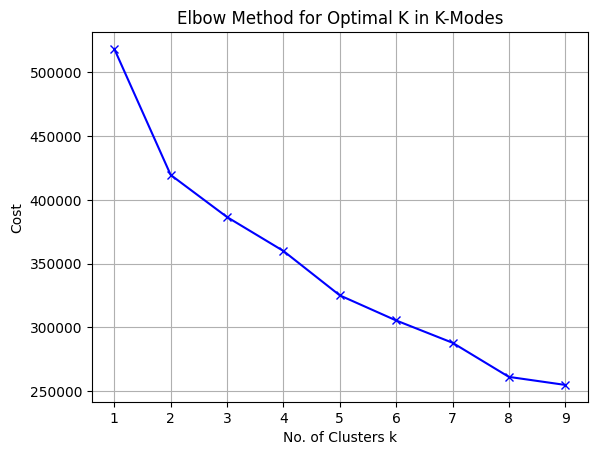

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

In [ ]:
# Construimos el modelo con 5 clusters

kmode_5 = KModes(n_clusters=5) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_5 = kmode_5.fit_predict(df_clean_copy)
clusters_5

array([0, 0, 1, ..., 1, 0, 3], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels5 = df_clean_copy.copy()
df_labels5.insert(2,"cluster_labels", clusters_5)
df_labels5

,sexo,lc1,cluster_labels,Edad_Categoría,region
0,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",0,Adulto Mayor,Costa
2,Hombre,46 Influenza y neumonía,0,Niño,Costa
6,Mujer,4 Enfermedades inmunoprevenibles,1,Niño,Sierra
8,Hombre,64 Agresiones (Homicidios),4,Adulto,Costa
12,Mujer,63 Lesiones autoinflingidas intencionalmente (...,1,Joven,Sierra
...,...,...,...,...,...
594674,Hombre,57 Accidentes de transporte terrestre,1,Adulto,Sierra
594675,Hombre,99 Causas mal definidas,2,Niño,Sierra
594678,Mujer,99 Causas mal definidas,1,Adulto,Costa
594680,Mujer,88 Resto de causas,0,Adulto Mayor,Sierra


In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels5.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=45130, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 5:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 5: 0.1572177


In [ ]:
# Construimos el modelo con 8 clusters

kmode_8 = KModes(n_clusters=8) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_8 = kmode_8.fit_predict(df_clean_copy)
clusters_8

array([0, 0, 1, ..., 1, 0, 3], dtype=uint16)

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.

df_labels8 = df_clean_copy.copy()
df_labels8.insert(2,"cluster_labels", clusters_8)
df_labels8

,sexo,lc1,cluster_labels,Edad_Categoría,region
0,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",0,Adulto Mayor,Costa
2,Hombre,46 Influenza y neumonía,0,Niño,Costa
6,Mujer,4 Enfermedades inmunoprevenibles,1,Niño,Sierra
8,Hombre,64 Agresiones (Homicidios),4,Adulto,Costa
12,Mujer,63 Lesiones autoinflingidas intencionalmente (...,1,Joven,Sierra
...,...,...,...,...,...
594674,Hombre,57 Accidentes de transporte terrestre,1,Adulto,Sierra
594675,Hombre,99 Causas mal definidas,2,Niño,Sierra
594678,Mujer,99 Causas mal definidas,1,Adulto,Costa
594680,Mujer,88 Resto de causas,0,Adulto Mayor,Sierra


In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels8.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=45130, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 8:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 8: 0.22979334


In [ ]:
# Aplicamos MCA para reducir la dimensionalidad del dataset original

df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225652 entries, 0 to 594681
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   sexo            225652 non-null  object
 1   lc1             225652 non-null  object
 2   Edad_Categoría  225652 non-null  object
 3   region          225652 non-null  object
dtypes: object(4)
memory usage: 8.6+ MB


In [ ]:
# Transformamos las variables no categóricas a variables tipo dummy

df_categorical = pd.get_dummies(df_clean_copy)
df_categorical

,sexo_Hombre,sexo_Mujer,lc1_1 Enfermedades infecciosas intestinales,"lc1_10 Neoplasia maligna del colon, sigmoide, recto y ano",lc1_100.0,lc1_101.0,lc1_11 Neoplasia maligna del hígado y de las vías biliares,lc1_12 Neoplasia maligna de la vesícula biliar y de otras,lc1_13 Neoplasia maligna de páncreas,lc1_14 Neoplasia maligna de laringe,...,"lc1_COVID-19, virus identificado","lc1_COVID-19, virus no identificado",Edad_Categoría_Adulto,Edad_Categoría_Adulto Mayor,Edad_Categoría_Joven,Edad_Categoría_Niño,region_Amazonía,region_Costa,region_Insular,region_Sierra
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
8,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
12,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594674,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
594675,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
594678,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
594680,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
# Importamos la libraría Prince que contiene MCA
import prince

# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_categoricalCopy = df_categorical.sample(n=225652, random_state=1)

# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categoricalCopy)
mca

MCA()

In [ ]:
# Transforme el conjunto de datos (esto le dará las
# coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categoricalCopy)
mca_coordinates

,0,1
293898,0.004869,-0.016433
175389,0.179019,-0.199009
10902,-0.174164,-0.191987
462488,-0.311654,-0.042047
260670,0.198953,0.100313
...,...,...
288206,0.216404,-0.086613
132040,-0.237891,0.148113
13451,-0.184001,-0.021326
550723,-0.130601,0.092762


In [ ]:
# Agregamos una columna con la etiqueta de los clusters. K = 8

mca_coordinates['cluster_labels'] = df_labels8['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
293898,0.004869,-0.016433,5
175389,0.179019,-0.199009,7
10902,-0.174164,-0.191987,0
462488,-0.311654,-0.042047,4
260670,0.198953,0.100313,3


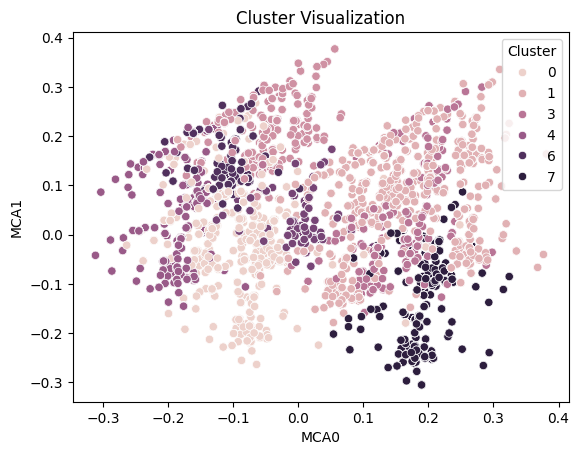

In [ ]:
# Dibuja el diagrama de dispersión coloreando los puntos por grupo.
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],
                y=mca_coordinates.iloc[:, 1], hue='cluster_labels')

# Agregar una leyenda
plt.legend(title='Cluster')

# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Show the plot
plt.show()

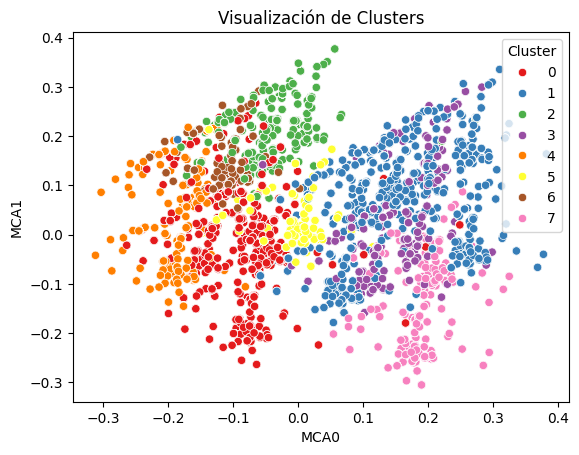

In [ ]:
# Define una paleta de colores con 8 colores distintivos
distinctive_palette = sns.color_palette("Set1", n_colors=8)

# Dibuja el diagrama de dispersión con la paleta de colores distintivos
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],
                y=mca_coordinates.iloc[:, 1], hue='cluster_labels', palette=distinctive_palette)

# Agrega una leyenda
plt.legend(title='Cluster')

# Opcional: Agrega un título y etiquetas de ejes
plt.title('Visualización de Clusters')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Muestra el gráfico
plt.show()


<h1><strong>🟩 MODELO FINAL: ULTIMA LIMPIEZA Y ANÁLISIS</h1>


<h1><strong>1. Lectura del dataset</strong></h1>

<h3></h3>

In [ ]:
#Instalamos la librería "pyreadstat" en caso de no tenerla
#!pip install pyreadstat
import pandas as pd
import pyreadstat

df = pd.read_spss("EDG_1990_2021.sav")
df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
0,Loja,Loja,Loja,1990.0,Julio,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,,,999,999,999,,,NaN
1,Loja,Loja,Loja,1990.0,Junio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
2,Loja,Loja,Loja,1990.0,Septiembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
3,Azuay,Cuenca,Cuenca,1990.0,Agosto,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
4,Azuay,Cuenca,Cuenca,1990.0,Agosto,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,,,999,999,999,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982276,Manabí,Jama,Jama,2021.0,Diciembre,16.0,2021-12-16,Sin información,Zonas sin especificar,Hombre,...,Urbana,Urbano,Y87 Secuelas de lesiones autoinfligidas inte...,Y87 Secuelas de lesiones autoinfligidas inte...,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y872 Secuelas de eventos de intención no dete...,88 Resto de causas
1982277,Chimborazo,Alausí,Alausí,2021.0,Marzo,23.0,2021-03-23,Ecuatoriana,Ecuador,Hombre,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982278,El Oro,El Guabo,El Guabo,2021.0,Noviembre,11.0,2021-11-11,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas
1982279,Loja,Espíndola,Amaluza,2021.0,Agosto,30.0,2021-08-30,Ecuatoriana,Ecuador,Mujer,...,Rural,Rural,Y89 Secuelas de otras causas externas,Y89 Secuelas de otras causas externas,103 Todas las demás causas externas,080 Todas las demás causas externas,060 Causas externas de morbilidad y de mortalidad,067 Todas las demás causas externas,Y899 Secuelas de causa externa no especificada,88 Resto de causas


<h1><strong>2. Obtención de la muestra</strong></h1>

<h3>Se obtuvo una muestra del <strong>54%</strong>de datos y con una semilla de aleatoriedad = <strong>7</strong> (nuestro número de grupo) </h3>

In [ ]:
# Sacando una muestra aleatoria del 54% de los datos
sample_df = df.sample(frac=0.54, random_state=7)  # random_state es una semilla para la reproducibilidad
sample_df

,prov_insc,cant_insc,parr_insc,anio_insc,mes_insc,dia_insc,fecha_insc,nac_fall,cod_pais,sexo,...,area_fall,area_res,causa3,causa,causa103,causa80,causa67A,causa67B,causa4,lc1
1177163,Guayas,Guayaquil,Guayaquil,2011.0,Noviembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,C90 Mieloma múltiple y tumores malignos de c...,C90 Mieloma múltiple y tumores malignos de c...,044 Mieloma multiple y tumores malignos de cél...,042 Mieloma múltiple y tumores malig de célula...,016 Tumores [neoplasias],018 Resto de tumores malignos,C900 Mieloma múltiple,"24 Neoplasia maligna del tejido linfático, hem..."
125559,Guayas,Guayaquil,Guayaquil,1992.0,Diciembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,,,999,999,999,,,NaN
901070,Los Ríos,Palenque,Palenque,2006.0,Julio,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,"J18 Neumonía, organismo no especificado","J18 Neumonía, organismo no especificado",074 Neumonia,059 Neumonia,031 Enfermedades del sistema respiratorio,032 Neumonía,"J189 Neumonía, no especificada",46 Influenza y neumonía
1850553,Pastaza,Pastaza,Puyo,2020.0,Septiembre,28.0,2020-09-28,Ecuatoriana,Ecuador,Mujer,...,Urbana,Urbano,R54 Senilidad,R54 Senilidad,"094 Sintomas, signos y hallazgos anormales cl...","071 Sintoms,signs y hallz anorm cli.y d.lab, n...","056 Síntomas, signos y hallazgos anormales","058 Otros síntomas, signos y hallazgos anormal...",R54 Senilidad,99 Causas mal definidas
1662890,Manabí,Portoviejo,18 de Octubre,2018.0,Agosto,6.0,2018-08-06,Ecuatoriana,Ecuador,Hombre,...,Urbana,Urbano,C18 Tumor maligno del colon,C18 Tumor maligno del colon,030 Tumor maligno del colon del recto y del ano,"028 Tumor maligno del colon, del recto y del ano",016 Tumores [neoplasias],018 Resto de tumores malignos,"C189 Tumor maligno del colon, parte no especi...","10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445450,Pichincha,Distrito Metropolitano de Quito,Quito,1998.0,Octubre,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,V89 Accidente de vehículo de motor o sin mot...,V89 Accidente de vehículo de motor o sin mot...,096 Accidentes de transporte,073 Accidentes de transporte,060 Causas externas de morbilidad y de mortalidad,061 Accidentes de transporte,V892 Persona lesionada en accidente de tránsi...,57 Accidentes de transporte terrestre
1047586,Esmeraldas,Esmeraldas,Esmeraldas,2009.0,Septiembre,NaN,NaN,NaN,,Hombre,...,Urbana,Urbano,J44 Otras enfermedades pulmonares obstructiv...,J44 Otras enfermedades pulmonares obstructiv...,076 Enfermedades crónicas de las vías resp inf...,061 Enfermedades crónicas de las vías resp. in...,031 Enfermedades del sistema respiratorio,034 Resto de enfermedades del sistema respirat...,"J449 Enfermedad pulmonar obstructiva crónica,...",47 Enfermedades crónicas de las vías respirato...
376692,Esmeraldas,Esmeraldas,Esmeraldas,1997.0,Octubre,NaN,NaN,NaN,,Mujer,...,Urbana,Urbano,"E14 Diabetes mellitus, no especificada","E14 Diabetes mellitus, no especificada",052 Diabetes mellitus,046 Diabetes mellitus,"023 Enfermedades endocrinas, nutricionales y m...","025 Resto de enfermedades endocrinas, nutricio...","E149 Diabetes mellitus no especificada, sin m...",26 Diabetes Mellitus
947617,Imbabura,Pimampiro,Pimampiro,2007.0,Mayo,NaN,NaN,NaN,,Mujer,...,Rural,Rural,I50 Insuficiencia cardíaca,I50 Insuficiencia cardíaca,068 Otras enfermedades del corazón,054 Otras Enfermedades del corazón,030 Enfermedades del sistema circulatorio,030 Enfermedades del sistema circulatorio,I500 Insuficiencia cardíaca congestiva,"41 Insuficiencia cardíaca, complicaciones y en..."


<h1><strong>3. Creación del archivo de la muestra</strong><h1>

<h3>Este archivo de muestra se creó solo con las variables que necesitábamos:</h3>

<ul>
  <li>Provincia de fallecimiento</li>
  <li>Edad</li>
  <li>Sexo</li>
  <li>Causa de fallecimiento (lc1)</li>
</ul>  

In [ ]:
sample_df[["prov_fall", "edad", "sexo","lc1"]].to_csv("muestra_test.csv", index=False)
#Leemos la muestra creada filtrada
df = pd.read_csv('muestra_test.csv')
df

,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,NaN
2,Guayas,10.0,Hombre,46 Influenza y neumonía
3,Pastaza,95.0,Mujer,99 Causas mal definidas
4,Manabí,85.0,Hombre,"10 Neoplasia maligna del colon, sigmoide, rect..."
...,...,...,...,...
1070427,Pichincha,20.0,Mujer,57 Accidentes de transporte terrestre
1070428,Esmeraldas,79.0,Hombre,47 Enfermedades crónicas de las vías respirato...
1070429,Esmeraldas,81.0,Mujer,26 Diabetes Mellitus
1070430,Imbabura,85.0,Mujer,"41 Insuficiencia cardíaca, complicaciones y en..."


<h1><strong>4. Limpieza de datos</strong><h1>

<h3>Se eliminaron las causas de fallecimiento que no eran relevantes para nuestro análisis:</h3>

<ul>
  <li>Muertes violentas</li>
  <li>Causas relacionadas a COVID-19</li>
  <li>Fallecimientos sin causa determinada o accidental</li>
</ul>  

In [ ]:
#Definimos un arreglo donde se encuentran las causas de muerte a eliminar de la Data
palabras_a_eliminar = [
    '64 Agresiones (Homicidios)',
    '58 Caidas accidentales',
    "57 Accidentes de transporte terrestre",
    '99 Causas mal definidas',
    'COVID-19, virus identificado',
    '88 Resto de causas',
    'COVID-19, virus no identificado',
    '64 Agresiones (Homicidios)',
    '59 Disparo de arma de fuego no intencional',
    '65 Eventos de intención no determinada',
    '100.0',
    '101.0',
    '100',
    '0',
]
# Filtramos las filas que no contienen las palabras específicas en 'lc1'
df_clean = df[~df['lc1'].isin(palabras_a_eliminar)]
df_clean


,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
1,Guayas,69.0,Hombre,NaN
2,Guayas,10.0,Hombre,46 Influenza y neumonía
4,Manabí,85.0,Hombre,"10 Neoplasia maligna del colon, sigmoide, rect..."
5,Imbabura,88.0,Mujer,42 Enfermedades cerebrovasculares
...,...,...,...,...
1070425,Manabí,18.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
1070428,Esmeraldas,79.0,Hombre,47 Enfermedades crónicas de las vías respirato...
1070429,Esmeraldas,81.0,Mujer,26 Diabetes Mellitus
1070430,Imbabura,85.0,Mujer,"41 Insuficiencia cardíaca, complicaciones y en..."


<h1><strong>5. Filtración por edad</strong><h1>

<h3>Se descartaron los datos con valores de edad mayores a 65 años (adultos mayores)</h3>


In [ ]:
df_clean = df_clean[df_clean["edad"] <= 65]
df_clean

,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
2,Guayas,10.0,Hombre,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,4 Enfermedades inmunoprevenibles
10,Tungurahua,8.0,Mujer,NaN
11,Guayas,61.0,Mujer,NaN
...,...,...,...,...
1070418,Pichincha,39.0,Hombre,NaN
1070419,Orellana,3.0,Mujer,60 Ahogamiento y sumersión accidentales
1070421,Guayas,62.0,Hombre,46 Influenza y neumonía
1070425,Manabí,18.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."


<h1><strong>6. Limpieza de datos nulos</strong><h1>

<h3>Se hizo la limpieza de los datos que tenían datos faltantes en alguna de los campos que utilizamos</h3>


In [ ]:
#Eliminamos valores Null del dataframe
df_clean = df_clean.dropna(axis=0)
df_clean

,prov_fall,edad,sexo,lc1
0,Guayas,64.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."
2,Guayas,10.0,Hombre,46 Influenza y neumonía
6,Pichincha,3.0,Mujer,4 Enfermedades inmunoprevenibles
12,Cañar,16.0,Mujer,63 Lesiones autoinflingidas intencionalmente (...
17,Azuay,2.0,Hombre,55 Ciertas afecciones originadas en el período...
...,...,...,...,...
1070414,Chimborazo,2.0,Hombre,55 Ciertas afecciones originadas en el período...
1070419,Orellana,3.0,Mujer,60 Ahogamiento y sumersión accidentales
1070421,Guayas,62.0,Hombre,46 Influenza y neumonía
1070425,Manabí,18.0,Hombre,"24 Neoplasia maligna del tejido linfático, hem..."


# <h1><strong>7. Pandas</strong><h1>

<h3>Se realizaron las siguientes tareas de optimización con ayuda de la biblioteca <strong><u>pandas</u></strong>:</h3>

<ol>
  <li>Se definieron 3 categorías de edades (niños, jóvenes y adultos)</li>
  <li>Se creó un nuevo campo llamado <strong>Edad_Categoría</strong> a partir del campo <strong>edad</strong></li>
  <li>Una vez que contábamos con la nueva variable, la variable <strong>edad</strong> original no era necesaria, así que la eliminamos</li>
</ol>  


  <li>Se convirtió esta columna a un tipo de dato <strong>category</strong></li>


In [ ]:
import pandas as pd

# Define the bins
bins = [0, 12, 25, 65]  # Niños (0-12), Jóvenes (13-25), Adultos (26-60)

# Define the labels
labels = ['Niño', 'Joven', 'Adulto']

# Create a new column "Edad_Categoría"
df_clean['Edad_Categoría'] = pd.cut(df['edad'], bins=bins, labels=labels)

# Delete the original 'edad' column
del df_clean['edad']

# Print the resulting dataframe
df_clean


C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\3943684185.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Edad_Categoría'] = pd.cut(df['edad'], bins=bins, labels=labels)


,prov_fall,sexo,lc1,Edad_Categoría
0,Guayas,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Adulto
2,Guayas,Hombre,46 Influenza y neumonía,Niño
6,Pichincha,Mujer,4 Enfermedades inmunoprevenibles,Niño
12,Cañar,Mujer,63 Lesiones autoinflingidas intencionalmente (...,Joven
17,Azuay,Hombre,55 Ciertas afecciones originadas en el período...,Niño
...,...,...,...,...
1070414,Chimborazo,Hombre,55 Ciertas afecciones originadas en el período...,Niño
1070419,Orellana,Mujer,60 Ahogamiento y sumersión accidentales,Niño
1070421,Guayas,Hombre,46 Influenza y neumonía,Adulto
1070425,Manabí,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Joven


<h1> Se observa que la variable <strong>Edad_Categoría</strong> aún contiene elementos nulos</h1>

In [ ]:
df_clean.isnull().sum()

prov_fall           0
sexo                0
lc1                 0
Edad_Categoría    453
dtype: int64

<h1>Se elimina los nulos del campo <strong>Edad_Categoría</strong></h1>

In [ ]:
df_clean.dropna(subset=["Edad_Categoría"], inplace=True)

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\2451943268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(subset=["Edad_Categoría"], inplace=True)


<h2> Se eliminan los registros que contengan <strong>'Exterior'</strong> en el campo de provincia de fallecimiento, ya que para nuestro análisis estamos descartando los fallecimientos fuera del territorio nacional.</h1>

In [ ]:
df_clean = df_clean[df_clean['prov_fall'] != 'Exterior']
df_clean

,prov_fall,sexo,lc1,Edad_Categoría
0,Guayas,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Adulto
2,Guayas,Hombre,46 Influenza y neumonía,Niño
6,Pichincha,Mujer,4 Enfermedades inmunoprevenibles,Niño
12,Cañar,Mujer,63 Lesiones autoinflingidas intencionalmente (...,Joven
17,Azuay,Hombre,55 Ciertas afecciones originadas en el período...,Niño
...,...,...,...,...
1070414,Chimborazo,Hombre,55 Ciertas afecciones originadas en el período...,Niño
1070419,Orellana,Mujer,60 Ahogamiento y sumersión accidentales,Niño
1070421,Guayas,Hombre,46 Influenza y neumonía,Adulto
1070425,Manabí,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Joven


<h1><strong>8. Optimización de campos</strong><h1>

<h3>Se completaron las siguientes acciones en los campos a utilizar para un mejor análisis:</h3>

<ul>
  <li>Se definió un diccionario para asignar cada provincia a su región correspondiente</li>
  <li>Se creó la columna <strong>región</strong> basada en la columna <strong>prov_fall</strong></li>
  <li>Se eliminó la columna <strong>prov_fall</strong></li>
</ul>  

In [ ]:

# Se define un diccionario que mapea cada provincia a su región correspondiente
region_dict = {
    'Carchi': 'Sierra',
    'Imbabura': 'Sierra',
    'Pichincha': 'Sierra',
    'Cotopaxi': 'Sierra',
    'Tungurahua': 'Sierra',
    'Bolívar': 'Sierra',
    'Chimborazo': 'Sierra',
    'Cañar': 'Sierra',
    'Azuay': 'Sierra',
    'Loja': 'Sierra',
    'Esmeraldas': 'Costa',
    'Manabí': 'Costa',
    'Los Ríos': 'Costa',
    'Santa Elena': 'Costa',
    'Guayas': 'Costa',
    'El Oro': 'Costa',
    'Santo Domingo de los Tsachilas': 'Costa',
    'Sucumbíos': 'Amazonía',
    'Orellana': 'Amazonía',
    'Napo': 'Amazonía',
    'Pastaza': 'Amazonía',
    'Morona Santiago': 'Amazonía',
    'Zamora Chinchipe': 'Amazonía',
}

# Crear una nueva columna 'región' basada en la columna 'prov_fall' usando el diccionario
df_clean['region'] = df_clean['prov_fall'].map(region_dict)

# Eliminamos la columna 'prov_fall'
df_clean = df_clean.drop('prov_fall', axis=1)
df_clean

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\2323058644.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['region'] = df_clean['prov_fall'].map(region_dict)


,sexo,lc1,Edad_Categoría,region
0,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Adulto,Costa
2,Hombre,46 Influenza y neumonía,Niño,Costa
6,Mujer,4 Enfermedades inmunoprevenibles,Niño,Sierra
12,Mujer,63 Lesiones autoinflingidas intencionalmente (...,Joven,Sierra
17,Hombre,55 Ciertas afecciones originadas en el período...,Niño,Sierra
...,...,...,...,...
1070414,Hombre,55 Ciertas afecciones originadas en el período...,Niño,Sierra
1070419,Mujer,60 Ahogamiento y sumersión accidentales,Niño,Amazonía
1070421,Hombre,46 Influenza y neumonía,Adulto,Costa
1070425,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",Joven,Costa


<h2>Se volvió a evaluar la cantidad de nulos existentes, se observa que <strong>región</strong> aún contiene registros nulos.<h2>

In [ ]:
df_clean.isnull().sum()

sexo                0
lc1                 0
Edad_Categoría      0
region            159
dtype: int64

<h2>Se eliminó la columna <strong>region</strong></h2>

In [ ]:
df_clean.dropna(subset=["region"], inplace=True)

<h2>Se volvió a consultar el número de registros con valores nulos y esta vez se obtuvieron 0</h2>

In [ ]:
df_clean.isnull().sum()

sexo              0
lc1               0
Edad_Categoría    0
region            0
dtype: int64

<h2>Información acerca de las <strong>columnas</strong> y su <strong>tipo de dato</strong> después de nuestro preprocesamiento:</h2>

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260704 entries, 0 to 1070431
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   sexo            260704 non-null  object  
 1   lc1             260704 non-null  object  
 2   Edad_Categoría  260704 non-null  category
 3   region          260704 non-null  object  
dtypes: category(1), object(3)
memory usage: 8.2+ MB


<h2>Creamos una copia del dataset para seguir haciendo modificaciones:</h2>

In [ ]:
df_clean_copy = df_clean.copy()

<h2>Convertimos la columna <u>Edad_categoría</u> a un tipo de dato <u>Object</u>:</h2>

In [ ]:
# Convert 'Edad_Categoría' column to object data type
df_clean_copy['Edad_Categoría'] = df_clean_copy['Edad_Categoría'].astype(object)

<h1><strong>9. Algoritmo K-Modes</strong></h1>


<h3>Decidimos implementar este algoritmo para nuestra creación de clústers ya que estamos trabajando con <u>datos categóricos</u>.</h3>

In [ ]:
# Instalar la librería k-modes


# Importamos la función k-modes
from kmodes.kmodes import KModes


# Determinamos el valor óptimo de K
# Hacemos un bucle repetitivo para generar 10 modelos, guardando los costos para generar el arreglo y graficarlos
cost_red = []
K_red = range(1,10)
for num_clusters in list(K_red):
  kmode_red = KModes(n_clusters=num_clusters) #Usaremos los hiperparámetros pre-establecidos
  kmode_red.fit_predict(df_clean_copy)
  cost_red.append(kmode_red.cost_)

<h1><strong>10. Método del codo</strong></h1>


<h3>Se hizo uso de la biblioteca <u>seaborn</u>, así como de <u>matplotlib</u> para la realización e impresión del <u>método del codo</u> para poder determinar el número de clústers a utilizar.</h>

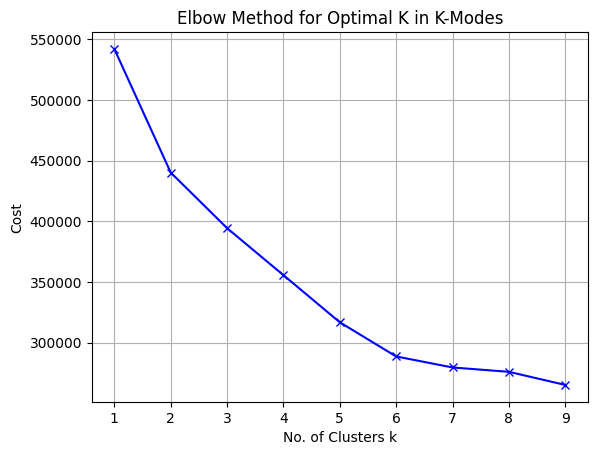

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Un arreglo que contiene los costos y que serán usando luego en la graficación
cost_red

plt.grid('True')
plt.plot(K_red, cost_red, 'bx-')
plt.xlabel('No. of Clusters k')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K in K-Modes')
plt.show()

<h1><strong>11. Creación del clúster</strong></h1>


<h3>Dada la gráfica proporcionada en el paso anterior, decidimos usar <u>6 clústers</u> para nuestro proyecto.</h3>

In [ ]:
# Construimos el modelo con 6 clusters

kmode_6 = KModes(n_clusters=6) # Usaremos los hiperparámetros pre-establecidos (Preguntar)
clusters_6 = kmode_6.fit_predict(df_clean_copy)
clusters_6

array([0, 3, 1, ..., 0, 0, 2], dtype=uint16)

<h3>Insertamos <u>etiquetas</u> para los clústers para un mejor procesamiento de los datos:</h3>

In [ ]:
# Insertemos las etiquetas en nuestro dataset original.
df_labels6 = df_clean_copy.copy()
df_labels6.insert(2,"cluster_labels", clusters_6)
df_labels6

,sexo,lc1,cluster_labels,Edad_Categoría,region
0,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",0,Adulto,Costa
2,Hombre,46 Influenza y neumonía,3,Niño,Costa
6,Mujer,4 Enfermedades inmunoprevenibles,1,Niño,Sierra
12,Mujer,63 Lesiones autoinflingidas intencionalmente (...,1,Joven,Sierra
17,Hombre,55 Ciertas afecciones originadas en el período...,3,Niño,Sierra
...,...,...,...,...,...
1070414,Hombre,55 Ciertas afecciones originadas en el período...,3,Niño,Sierra
1070419,Mujer,60 Ahogamiento y sumersión accidentales,2,Niño,Amazonía
1070421,Hombre,46 Influenza y neumonía,0,Adulto,Costa
1070425,Hombre,"24 Neoplasia maligna del tejido linfático, hem...",0,Joven,Costa


<h1><strong>12. Average Silhouette Score</strong></h1>

<h3>Con ayuda de las bibliotecas <u>gower</u> y <u>sklearn</u>, realizamos el cálculo del <strong><u>Average Silhouette Score</u></strong> para una muestra de 20,000 registros y 6 clústers, donde dicho parámetro nos dió 0.3147:</h3>

In [ ]:
# Calculo de Average Silhouette Score

import gower
from sklearn.metrics import silhouette_score

# Calculo de Average Silhouette Score

# Convertir todas las columnas categóricas a strings
df_str = df_labels6.map(str)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=20000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'],
                                        metric='precomputed')

print("Average Categorical Silhouette Score con K = 6:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 6: 0.31474367


<h3>Transformamos las variables que eran de tipo <u>No Categóricas</u> a tipo <u>Dummy</u>:</h3>

In [ ]:
# Transformamos las variables no categóricas a variables tipo dummy

df_categorical = pd.get_dummies(df_clean_copy)
df_categorical

,sexo_Hombre,sexo_Mujer,lc1_1 Enfermedades infecciosas intestinales,"lc1_10 Neoplasia maligna del colon, sigmoide, recto y ano",lc1_11 Neoplasia maligna del hígado y de las vías biliares,lc1_12 Neoplasia maligna de la vesícula biliar y de otras,lc1_13 Neoplasia maligna de páncreas,lc1_14 Neoplasia maligna de laringe,"lc1_15 Neoplasia maligna de la tráquea, bronquios y pulmón",lc1_16 Melanoma y otra neoplasia maligna de la piel,...,lc1_63 Lesiones autoinflingidas intencionalmente (Suicidio),lc1_7 Enfermedad por virus de la inmunodeficiencia (VIH),lc1_8 Neoplasia maligna del esófago,lc1_9 Neoplasia maligna del estómago,Edad_Categoría_Adulto,Edad_Categoría_Joven,Edad_Categoría_Niño,region_Amazonía,region_Costa,region_Sierra
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
12,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
17,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070414,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1070419,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1070421,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1070425,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


<h1><strong>14. Multiple Correspondence Analysis (MCA)</strong></h1>

<h3>Para el cálculo del MCA utilizamos la biblioteca <u>prince</u>, la cual contiene dicha funcioń ya implementada, esto lo realizamos para 2 componentes:</h3>

In [ ]:
# Importamos la libraría Prince que contiene MCA
import prince

# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)

#Sacamos una muestra caso contrario la memoria RAM no será suficiente
df_categoricalCopy = df_categorical.sample(n=260704, random_state=7)

# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categoricalCopy)
mca

MCA()

<h3>Transformamos nuestro conjunto de datos para poder asignarlos a las coordenadas de la función MCA: </h3>

In [ ]:
#MCA_coordinates
mca_coordinates = mca.transform(df_categoricalCopy)
mca_coordinates

,0,1
56036,0.299649,0.121983
42,-0.160089,0.247473
925763,-0.116801,-0.194543
821031,-0.196592,-0.217672
31124,0.402651,-0.105600
...,...,...
964935,0.005333,0.228997
44112,-0.075376,0.215759
204462,0.006699,-0.134611
777135,0.299649,0.121983


<h3>Se agregó una nueva columna con las etiquetas de los clústers, recordemos que elegimos 6 como el número de dichos componentes requeridos:</h3>

In [ ]:
# Agregamos una columna con la etiqueta de los clusters. K = 6

mca_coordinates['cluster_labels'] = df_labels6['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
56036,0.299649,0.121983,2
42,-0.160089,0.247473,4
925763,-0.116801,-0.194543,0
821031,-0.196592,-0.217672,0
31124,0.402651,-0.105600,3


<h1><strong>15. Graficación de los clústers</strong></h1>

<h3>Una vez que contábamos con nuestros datos necesarios, graficamos nuestros clústers, para ello:</h3>

<ul>
  <li>Definimos una paleta de colores</li>
  <li>Dibujamos el diagrama de dispersión</li>
  <li>Agregamos leyendas/etiquetas al gráfico</li>
</ul>

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\3493798282.py:5: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],


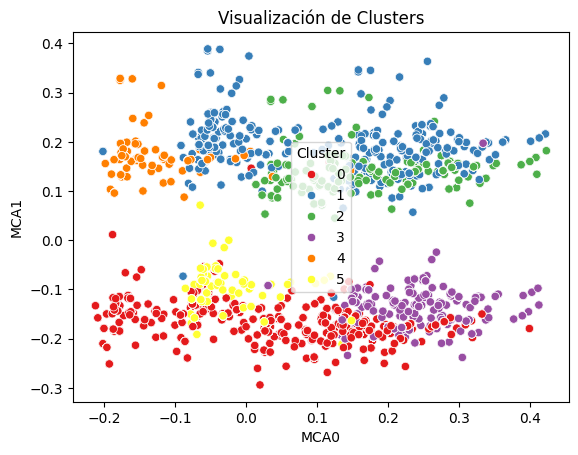

In [ ]:
# Define una paleta de colores con 8 colores distintivos
distinctive_palette = sns.color_palette("Set1", n_colors=8)

# Dibuja el diagrama de dispersión con la paleta de colores distintivos
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0],
                y=mca_coordinates.iloc[:, 1], hue='cluster_labels', palette=distinctive_palette)

# Agrega una leyenda
plt.legend(title='Cluster')

# Opcional: Agrega un título y etiquetas de ejes
plt.title('Visualización de Clusters')
plt.xlabel('MCA0')
plt.ylabel('MCA1')

# Muestra el gráfico
plt.show()

<h1><strong>16. Análisis Final y toma de decisiones</strong></h1>

<h3>Una vez que contábamos un modelo final sólido comenzamos con el análisis del significado de cada cluster</h3>


<h2><strong>Paso 1: Análisis Descriptivo por Cluster </h2>
Para entender mejor qué caracteriza a cada cluster, calculamos las distribuciones de las variables sexo, región, Edad_Categoria y lc1 dentro de cada cluster.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución por Sexo
sexo_por_cluster = df_labels6.groupby('cluster_labels')['sexo'].value_counts(normalize=True).unstack().fillna(0)
print(sexo_por_cluster)

# Distribución por Región
region_por_cluster = df_labels6.groupby('cluster_labels')['region'].value_counts(normalize=True).unstack().fillna(0)
print(region_por_cluster)

# Distribución por Edad_Categoria
edad_por_cluster = df_labels6.groupby('cluster_labels')['Edad_Categoría'].value_counts(normalize=True).unstack().fillna(0)
print(edad_por_cluster)

# Distribución por lc1
lc1_por_cluster = df_labels6.groupby('cluster_labels')['lc1'].value_counts(normalize=True).unstack().fillna(0)
print(lc1_por_cluster)

sexo              Hombre     Mujer
cluster_labels                    
0               0.998694  0.001306
1               0.035451  0.964549
2               0.000000  1.000000
3               0.926448  0.073552
4               0.000000  1.000000
5               1.000000  0.000000
region          Amazonía     Costa    Sierra
cluster_labels                              
0               0.035337  0.953631  0.011031
1               0.034479  0.132032  0.833489
2               0.044271  0.802713  0.153017
3               0.034528  0.063399  0.902073
4               0.002418  0.997582  0.000000
5               0.005187  0.000000  0.994813
Edad_Categoría    Adulto     Joven      Niño
cluster_labels                              
0               0.731379  0.116575  0.152046
1               0.763908  0.110567  0.125524
2               0.000000  0.248199  0.751801
3               0.065956  0.221624  0.712420
4               0.994753  0.005247  0.000000
5               0.996414  0.003586  0.000000


<h2><strong>Paso 2: Visualización de las Distribuciones </h2>
Procedemos a generar gráficos de barras apiladas para visualizar las distribuciones de las variables por cluster.

<strong>1. Distribución de Sexo por Cluster

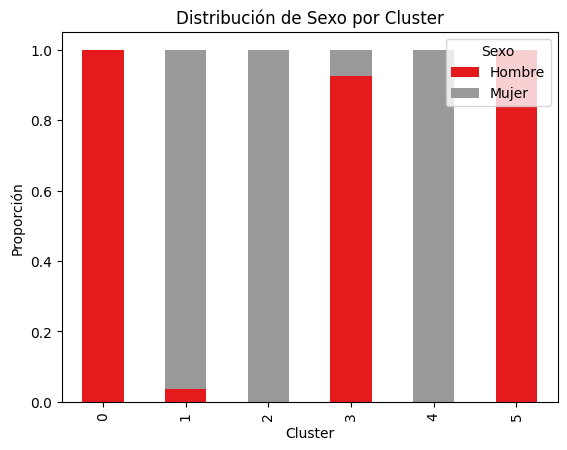

In [ ]:
sexo_por_cluster.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Distribución de Sexo por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.legend(title='Sexo')
plt.show()

<strong>2. Distribución de Región por Cluster

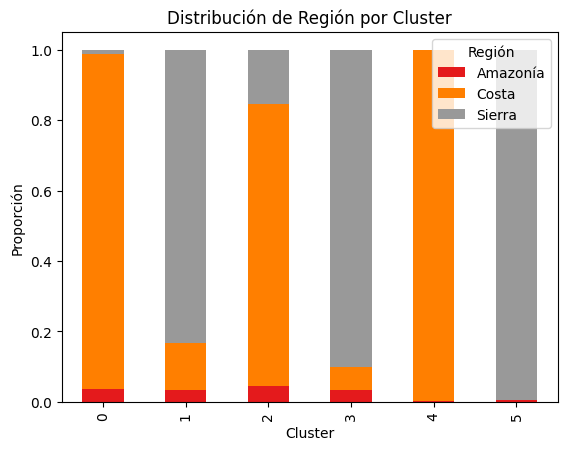

In [ ]:
region_por_cluster.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Distribución de Región por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.legend(title='Región')
plt.show()

<strong>3. Distribución de rango de edad (Edad_Categoria) por Cluster

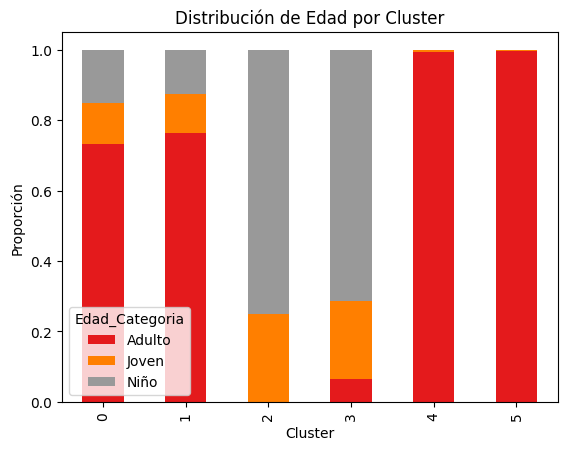

In [ ]:
edad_por_cluster.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Distribución de Edad por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.legend(title='Edad_Categoria')
plt.show()

<strong>4. Distribución de lc1 (Causa de muerte) por Cluster

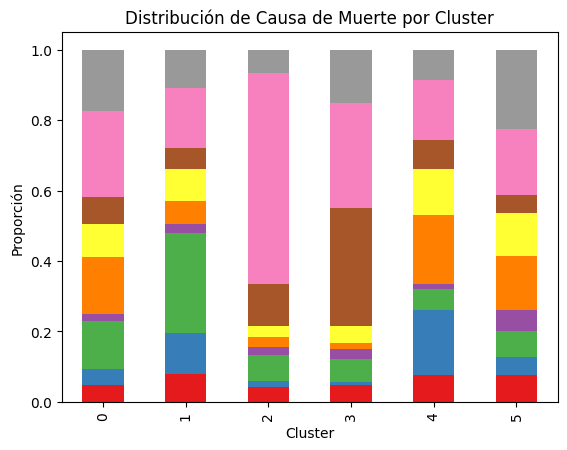

In [ ]:
lc1_por_cluster.plot(kind='bar', stacked=True, colormap='Set1', legend=False)
plt.title('Distribución de Causa de Muerte por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.show()

<h2><strong>Paso 3: Interpretación y Toma de Decisiones </h2>
En función de los gráficos, se visualiza cómo se distribuyen las variables en cada cluster. Esto permite identificar patrones específicos en cada grupo, tales como:

- Sexo predominante en cada cluster
- Distribución geográfica (necesidades regionales particulares)
- Edad (para crear estrategias específicas para diferentes grupos de edad) [Grupos: Niños (0-12), Jóvenes (13-25), Adultos (26-60) ]
- Causas de muerte (intervenciones de salud más necesarias para cada grupo)

<h3><strong>⚪ Resumen Descriptivo de Cada Cluster</strong></h3>

Utilizamos pandas para calcular y presentar las características predominantes de cada cluster

In [ ]:

# Creando una función para resumir la información de cada cluster
def resumen_cluster(df, cluster_label):
    cluster_data = df[df['cluster_labels'] == cluster_label]
    sexo_pred = cluster_data['sexo'].mode()[0]
    region_pred = cluster_data['region'].mode()[0]
    edad_pred = cluster_data['Edad_Categoría'].mode()[0]
    causas_pred = cluster_data['lc1'].value_counts().head(7).index.tolist()

    resumen = {
        'Cluster': cluster_label,
        'Sexo predominante': sexo_pred,
        'Región predominante': region_pred,
        'Edad predominante': edad_pred,
        'Causas de muerte predominantes': causas_pred
    }

    return resumen

# Aplicar la función para cada cluster
clusters_resumen = [resumen_cluster(df_labels6, i) for i in range(6)]

# Convertir a DataFrame para mejor visualización
resumen_df = pd.DataFrame(clusters_resumen)
print(resumen_df)


   Cluster Sexo predominante Región predominante Edad predominante  \
0        0            Hombre               Costa            Adulto   
1        1             Mujer              Sierra            Adulto   
2        2             Mujer               Costa              Niño   
3        3            Hombre              Sierra              Niño   
4        4             Mujer               Costa            Adulto   
5        5            Hombre              Sierra            Adulto   

                      Causas de muerte predominantes  
0  [55 Ciertas afecciones originadas en el períod...  
1  [26 Diabetes Mellitus, 42 Enfermedades cerebro...  
2  [55 Ciertas afecciones originadas en el períod...  
3  [46 Influenza y neumonía, 55 Ciertas afeccione...  
4  [42 Enfermedades cerebrovasculares, 35 Enferme...  
5  [51 Cirrosis y otras enfermedades del hígado, ...  


<h3><strong> 🔴 Resumen Descriptivo del Cluster 0</strong></h3>


<p><strong>Sexo predominante:</strong> Hombre</p>
<p><strong>Región predominante:</strong> Costa</p>
<p><strong>Edad predominante:</strong> Adulto</p>


<h4><strong>Gráfico:</strong></h4>

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\538729725.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=causas_0.values, y=causas_0.index, palette='Set1')


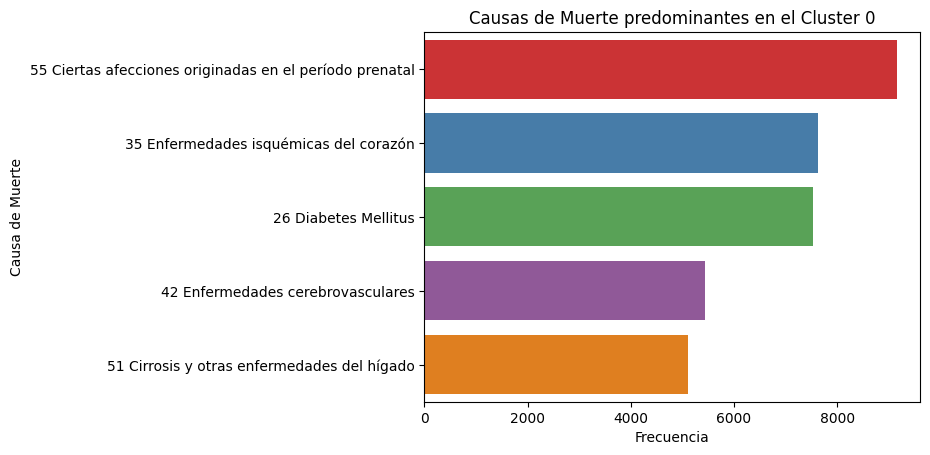

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos para el Cluster 0
cluster_0_data = df_labels6[df_labels6['cluster_labels'] == 0]

# Contamos las frecuencias de las causas de muerte
causas_0 = cluster_0_data['lc1'].value_counts().head(5)

# Creamos el gráfico de barras
sns.barplot(x=causas_0.values, y=causas_0.index, palette='Set1')
plt.title('Causas de Muerte predominantes en el Cluster 0')
plt.xlabel('Frecuencia')
plt.ylabel('Causa de Muerte')
plt.show()


<h4><strong>Toma de decisiones (Cluster 0):</strong></h4>

<h5><strong>Campañas de concientización y detección temprana:</strong></h5>
<p>En función de los resultados obtenidos, podemos implementar campañas de concientización sobre salud donde se podría incluir exámenes médicos gratuitos para la detección temprana de enfermedades cardíacas, diabetes y otras afecciones crónicas comunes en este grupo demográfico.</p>

<h5><strong>Programas de educación en salud:</strong></h5>
<p>Desarrollar programas de educación en salud que aborden hábitos de vida saludables, incluida la promoción de una dieta equilibrada, el ejercicio regular y la reducción del consumo de alcohol para prevenir enfermedades del corazón, diabetes mellitus y enfermedades hepáticas.</p>

<h5><strong>Mejora de acceso a la atención médica:</strong></h5>
<p>Aumentar el acceso a la atención médica en la región costera mediante la apertura de más centros de atención primaria y la mejora de la infraestructura de salud existente. Esto garantiza que los residentes tengan acceso adecuado a servicios de salud preventiva y de tratamiento para abordar las principales causas de muerte identificadas en el Cluster 0.</p>



<h3><strong> 🔵 Resumen Descriptivo del Cluster 1</strong></h3>

<p><strong>Sexo predominante:</strong> Mujer</p>
<p><strong>Región predominante:</strong> Sierra</p>
<p><strong>Edad predominante:</strong> Adulto</p>

<h4><strong>Gráfico:</strong></h4>

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\4009558066.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=causas_1.values, y=causas_1.index, palette='Set1')


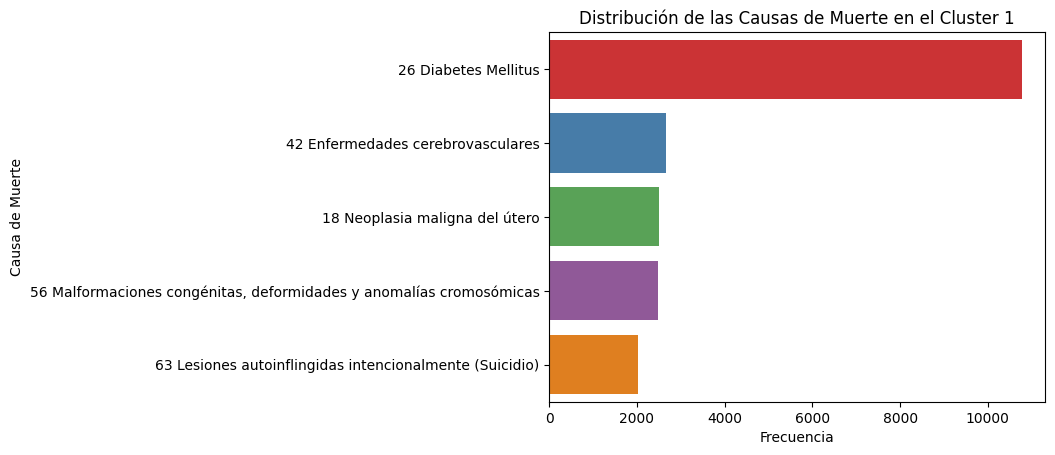

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos para el Cluster 1
cluster_1_data = df_labels6[df_labels6['cluster_labels'] == 1]

# Contamos las frecuencias de las causas de muerte
causas_1 = cluster_1_data['lc1'].value_counts().head(5)

# Creamos el gráfico de barras
sns.barplot(x=causas_1.values, y=causas_1.index, palette='Set1')
plt.title('Distribución de las Causas de Muerte en el Cluster 1')
plt.xlabel('Frecuencia')
plt.ylabel('Causa de Muerte')
plt.show()

<h4><strong>Toma de decisiones (Cluster 1):</strong></h4>

<h5><strong>Programas de prevención y manejo de la diabetes:</strong></h5>
<p>Dado que la diabetes es la principal causa de muerte en este grupo, se pueden implementar programas de educación sobre nutrición, ejercicio y control de peso en la región de la Sierra como un método de prevención.</p>

<h5><strong>Atención y prevención de enfermedades cerebrovasculares:</strong></h5>
<p>Se pueden desarrollar programas de prevención y detección temprana que promuevan estilos de vida saludables, incluida la reducción del consumo de tabaco y alcohol, una dieta equilibrada y la actividad física regular.</p>

<h5><strong>Prevención del suicidio y apoyo psicosocial:</strong></h5>
<p>Con la alta incidencia de lesiones autoinfligidas y suicidio, se pueden desarrollar programas de prevención que incluyan capacitación en salud mental para profesionales de la salud, líneas de ayuda y servicios de apoyo psicosocial.</p>


<h3><strong> 🟢 Resumen Descriptivo del Cluster 2</strong></h3>

<p><strong>Sexo predominante:</strong> Mujer</p>
<p><strong>Región predominante:</strong> Costa</p>
<p><strong>Edad predominante:</strong> Niño</p>


<h4><strong>Gráfico:</strong></h4>

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\2466314548.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=causas_2.values, y=causas_2.index, palette='Set1')


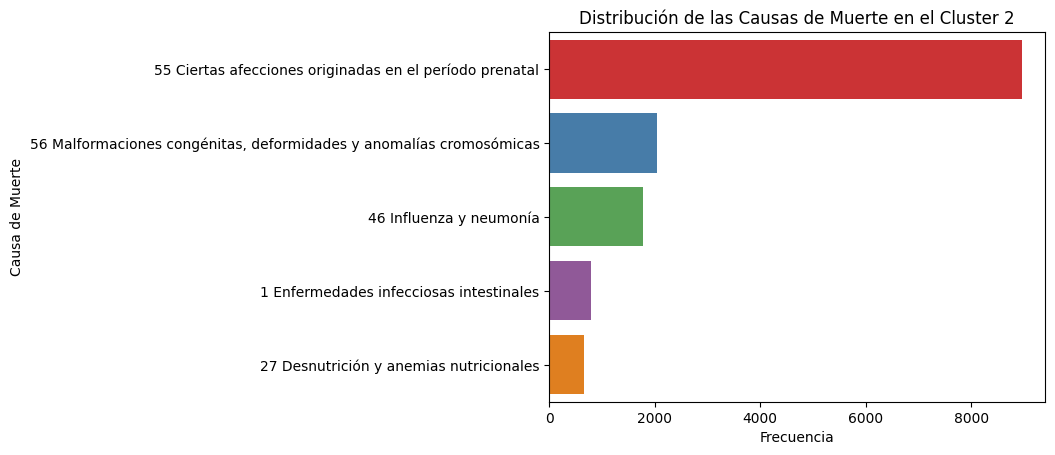

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos para el Cluster 2
cluster_2_data = df_labels6[df_labels6['cluster_labels'] == 2]

# Contamos las frecuencias de las causas de muerte
causas_2 = cluster_2_data['lc1'].value_counts().head(5)

# Creamos el gráfico de barras
sns.barplot(x=causas_2.values, y=causas_2.index, palette='Set1')
plt.title('Distribución de las Causas de Muerte en el Cluster 2')
plt.xlabel('Frecuencia')
plt.ylabel('Causa de Muerte')
plt.show()

<h4><strong>Toma de decisiones (Cluster 2):</strong></h4>

<h5><strong>Atención prenatal y cuidado materno-infantil:</strong></h5>
<p>Dado que las afecciones originadas en el período prenatal y las malformaciones congénitas son las principales causas de muerte, se deben implementar programas de atención prenatal integral y cuidado materno-infantil. Esto incluye acceso a servicios de atención médica durante el embarazo.</p>

<h5><strong>Vacunación y prevención de enfermedades infecciosas:</strong></h5>
<p>Dado que la influenza y la neumonía, así como las enfermedades infecciosas intestinales, son causas importantes de mortalidad en este grupo, se deben fortalecer los programas de vacunación infantil y promover prácticas de higiene adecuadas para la prevención en la Costa.</p>

<h5><strong>Mejora de infraestructuras de salud y acceso a servicios médicos:</strong></h5>
<p>Es crucial mejorar la infraestructura de salud en la región costera para garantizar un acceso adecuado a servicios médicos de calidad.</p>


<h3><strong> 🟣 Resumen Descriptivo del Cluster 3</strong></h3>

<p><strong>Sexo predominante:</strong> Hombre</p>
<p><strong>Región predominante:</strong> Sierra</p>
<p><strong>Edad predominante:</strong> Niño</p>

<h4><strong>Gráfico:</strong></h4>

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\3347706281.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=causas_3.values, y=causas_3.index, palette='Set1')


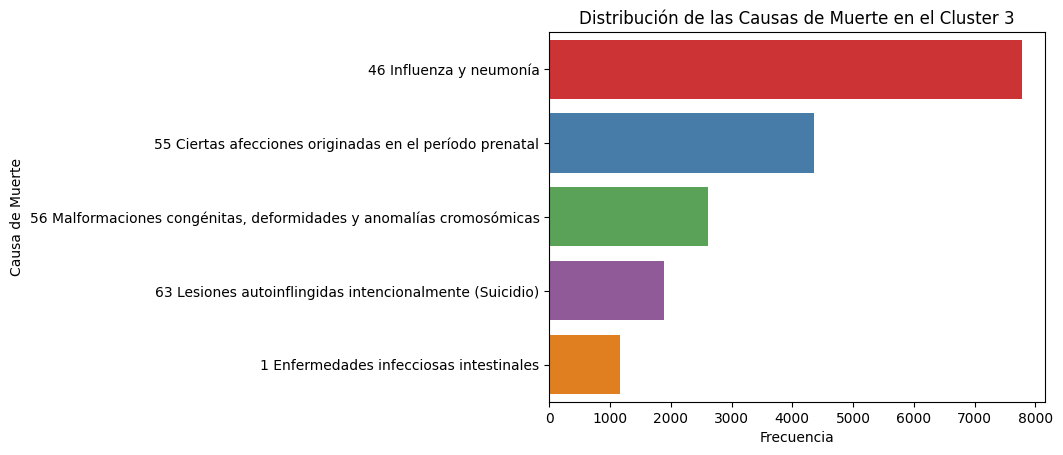

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos para el Cluster 2
cluster_3_data = df_labels6[df_labels6['cluster_labels'] == 3]

# Contamos las frecuencias de las causas de muerte
causas_3 = cluster_3_data['lc1'].value_counts().head(5)

# Creamos el gráfico de barras
sns.barplot(x=causas_3.values, y=causas_3.index, palette='Set1')
plt.title('Distribución de las Causas de Muerte en el Cluster 3')
plt.xlabel('Frecuencia')
plt.ylabel('Causa de Muerte')
plt.show()

<h4><strong>Toma de decisiones (Cluster 3):</strong></h2>

<h5><strong>Programas de vacunación y prevención de enfermedades respiratorias:</strong></h4>
<p>Dado que la influenza y la neumonía son las principales causas de muerte en este grupo, se deben implementar programas de vacunación amplios y accesibles en la región de la Sierra. Además, se pueden promover prácticas de higiene respiratoria y acceso a atención médica temprana para el tratamiento de infecciones respiratorias agudas.</p>

<h5><strong>Atención prenatal y materna:</strong></h5>
<p>Se deben fortalecer los servicios de atención prenatal y materna en la región de la Sierra. Esto incluye acceso a controles prenatales regulares, educación sobre salud materna y prenatal, y acceso a atención médica especializada.</p>

<h5><strong>Mejora de infraestructuras de salud y acceso a servicios médicos:</strong></h5>
<p>Es crucial mejorar la infraestructura de salud en la región de la Sierra para garantizar un acceso adecuado a servicios médicos de calidad para niños y niñas, y de esa forma también prevenir otro tipo de enfermedades.</p>


<h3><strong> 🔵 Resumen Descriptivo del Cluster 4</strong></h3>

<p><strong>Sexo predominante:</strong> Mujer</p>
<p><strong>Región predominante:</strong> Costa</p>
<p><strong>Edad predominante:</strong> Adulto</p>

<h4><strong>Gráfico:</strong></h4>

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\816492024.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=causas_4.values, y=causas_4.index, palette='Set1')


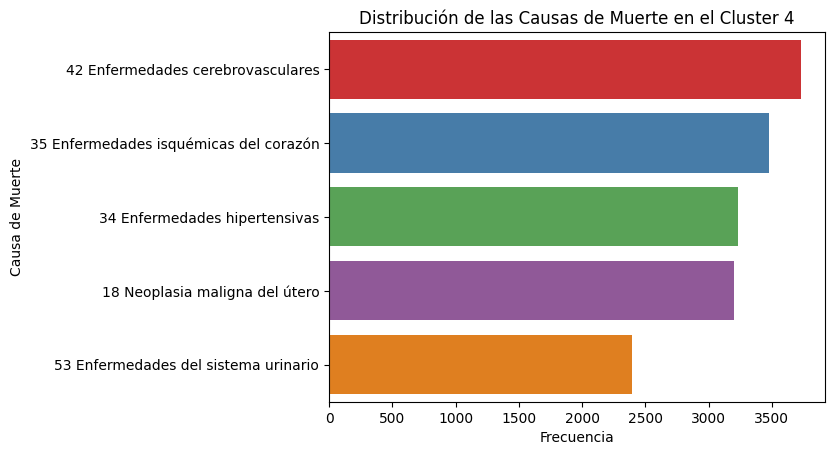

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos para el Cluster 2
cluster_4_data = df_labels6[df_labels6['cluster_labels'] == 4]

# Contamos las frecuencias de las causas de muerte
causas_4 = cluster_4_data['lc1'].value_counts().head(5)

# Creamos el gráfico de barras
sns.barplot(x=causas_4.values, y=causas_4.index, palette='Set1')
plt.title('Distribución de las Causas de Muerte en el Cluster 4')
plt.xlabel('Frecuencia')
plt.ylabel('Causa de Muerte')
plt.show()

<h4><strong>Toma de decisiones (Cluster 4):</strong></h4>

<h5><strong>Programas de prevención y manejo de enfermedades cerebrovasculares y cardíacas:</strong></h5>
<p>Se deben implementar programas de educación y prevención que promuevan estilos de vida saludables. Esto incluye campañas sobre la importancia de la dieta equilibrada, el ejercicio regular, la reducción del consumo de tabaco y alcohol, y el control de factores de riesgo como la hipertensión y el colesterol elevado.</p>

<h5><strong>Prevención y tratamiento de enfermedades hipertensivas:</strong></h5>
<p>Se pueden desarrollar programas específicos para la detección temprana y el control de la hipertensión arterial.</p>

<h5><strong>Atención integral de la salud de la mujer:</strong></h5>
<p>Dado que la neoplasia maligna del útero es una de las principales causas de muerte, se deben implementar programas de detección temprana del cáncer de útero, como pruebas de Papanicolaou regulares y vacunación contra el virus del papiloma humano (VPH).</p>


<h3><strong> 🟡 Resumen Descriptivo del Cluster 5</strong></h3>

<p><strong>Sexo predominante:</strong> Hombre</p>
<p><strong>Región predominante:</strong> Sierra</p>
<p><strong>Edad predominante:</strong> Adulto</p>

<h4><strong>Gráfico:</strong></h4>

C:\Users\fvela\AppData\Local\Temp\ipykernel_12784\3188053448.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=causas_5.values, y=causas_5.index, palette='Set1')


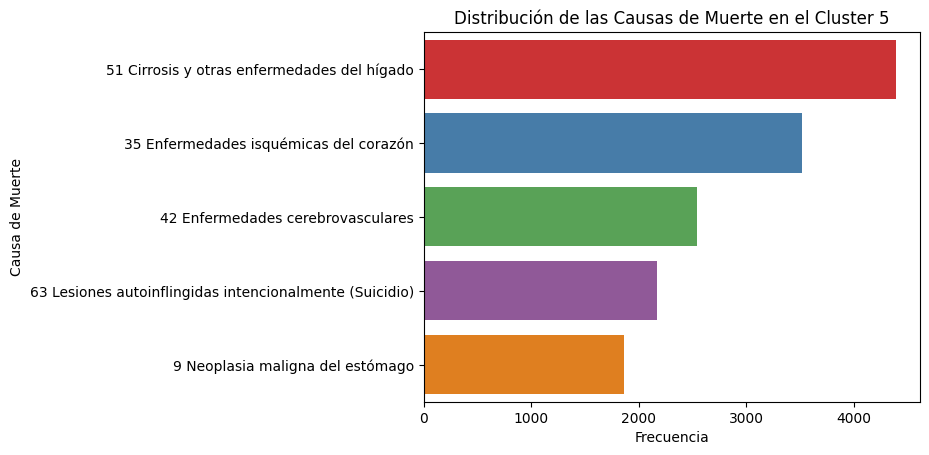

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtramos los datos para el Cluster 2
cluster_5_data = df_labels6[df_labels6['cluster_labels'] == 5]

# Contamos las frecuencias de las causas de muerte
causas_5 = cluster_5_data['lc1'].value_counts().head(5)

# Creamos el gráfico de barras
sns.barplot(x=causas_5.values, y=causas_5.index, palette='Set1')
plt.title('Distribución de las Causas de Muerte en el Cluster 5')
plt.xlabel('Frecuencia')
plt.ylabel('Causa de Muerte')
plt.show()

<h4><strong>Toma de decisiones (Cluster 5):</strong></h4>

<h5><strong>Prevención y tratamiento de enfermedades hepáticas:</strong></h5>
<p>Se deben implementar programas de prevención y tratamiento centrados en la reducción del consumo de alcohol y la promoción de hábitos de vida saludables.</p>

<h5><strong>Atención y prevención de enfermedades cerebrovasculares:</strong></h5>
<p>Las enfermedades cerebrovasculares también son una causa significativa de muerte en este grupo. Se pueden desarrollar programas de prevención que promuevan estilos de vida saludables, incluida la reducción del consumo de tabaco y alcohol, una dieta equilibrada y la actividad física regular.</p>

<h5><strong>Prevención del suicidio y apoyo en salud mental:</strong></h5>
<p>Servicios de apoyo psicosocial, y campañas de concienciación sobre la importancia de la salud mental. Es esencial ofrecer recursos de apoyo y tratamiento accesibles para personas que puedan estar en riesgo, así como programas comunitarios que fomenten la resiliencia y el bienestar emocional.</p>
